 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random as rand
import math

Accuracy: 91.0 %


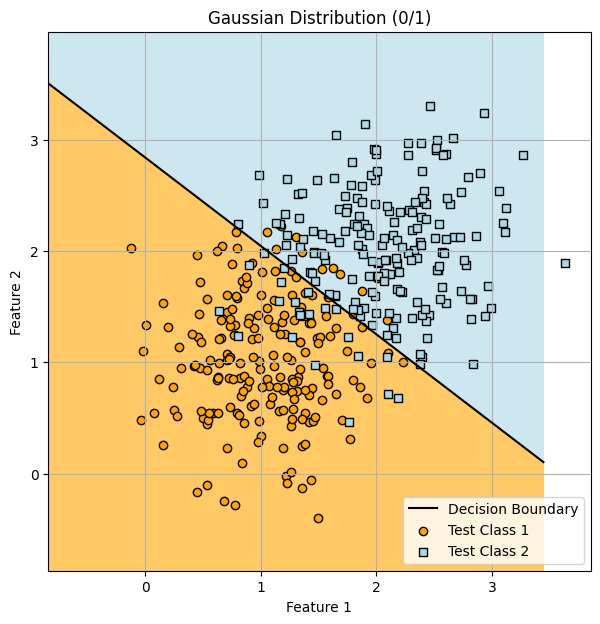

Accuracy: 91.0 %


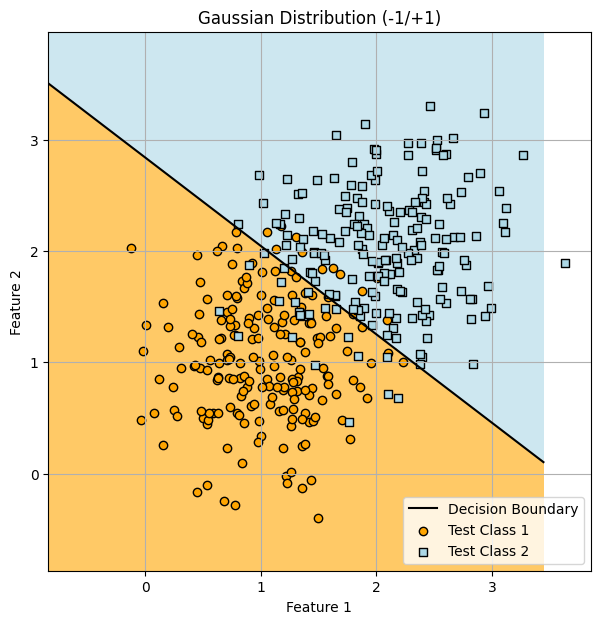

Accuracy: 85.0 %


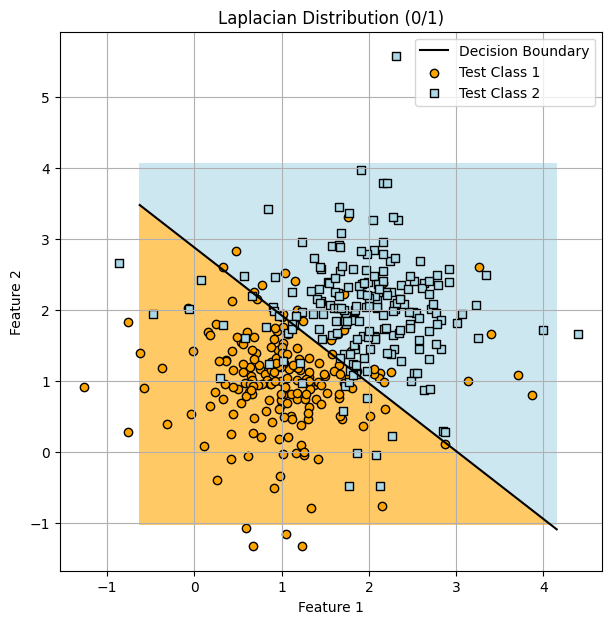

Accuracy (Gaussian, labels 0/1): 91.00%
Accuracy (Gaussian, labels -1/+1): 91.00%
Accuracy (Laplacian, labels 0/1): 85.00%


In [2]:
##################################################
# Part‑1)-a: Data Generation (Gaussian)
##################################################
mean1 = [1, 1]  # Mean of class 1
mean2 = [2, 2]  # Mean of class 2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix (same for both classes)

# Generate training data (50 samples per class)
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.vstack((class1_tr, class2_tr))
tr_targets = np.hstack((np.zeros(50), np.ones(50)))  # For 0/1 labeling: Class1=0, Class2=1

# Generate testing data (200 samples per class)
class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
te_data = np.vstack((class1_te, class2_te))
te_targets = np.hstack((np.zeros(200), np.ones(200)))


##################################################
# Part‑1)-b: Decision Boundary using Least Squares
##################################################
def LS_Classify(X_train, Y_train, X_test):
    # Append bias term to both training and testing data
    X_train_aug = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test_aug = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

    # Compute weight vector using pseudo-inverse.
    W = np.dot(np.linalg.pinv(X_train_aug), Y_train)

    # Obtain continuous scores for the test set.
    Y_scores = np.dot(X_test_aug, W)

    # For label set {0,1} use threshold 0.5; for {-1, 1} use threshold 0.
    unique_labels = np.unique(Y_train)
    if set(unique_labels) == {-1, 1}:
        Y_pred = np.where(Y_scores >= 0, 1, -1)
    else:
        Y_pred = np.where(Y_scores >= 0.5, 1, 0)
    return Y_pred, W


##################################################
# Part‑1)-c: Accuracy Computation
##################################################
def LS_Classify_Accuracy(Y_test, Y_pred):
    acc = np.mean(Y_pred == Y_test)
    print('Accuracy:', acc * 100, '%')
    return acc


##################################################
# Part‑1)-d: Visualization Function
##################################################
def plot_decision_boundary(X_train, Y_train, X_test, W, te_class1, te_class2, title):
    # Create a grid over the training region
    x_min = X_train[:, 0].min() - 0.5
    x_max = X_train[:, 0].max() + 0.5
    y_min = X_train[:, 1].min() - 0.5
    y_max = X_train[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Decision function: for input (x,y): value = W[0] + W[1]*x + W[2]*y
    Z = W[0] + W[1] * xx + W[2] * yy

    # Apply threshold based on labeling scheme:
    unique_labels = np.unique(Y_train)
    if set(unique_labels) == {-1, 1}:
        decision_region = Z >= 0
    else:
        decision_region = Z >= 0.5

    # Use a light color for each region
    cmap_light = ListedColormap(['#FFA500', '#ADD8E6'])  # orange and lightblue
    plt.figure(figsize=(7, 7))
    plt.contourf(xx, yy, decision_region, cmap=cmap_light, alpha=0.6)

    # Plot the decision boundary as the line where the decision function equals the threshold.
    # For {0,1} thresholds, line is: W0 + W1*x + W2*y = 0.5 => y = -(W0 - 0.5 + W1*x)/W2.
    # For {-1, 1} thresholds, line is: W0 + W1*x + W2*y = 0 => y = -(W0 + W1*x)/W2.
    if set(unique_labels) == {-1, 1}:
        boundary = -(W[0] + W[1] * xx[0]) / W[2]
    else:
        boundary = -(W[0] - 0.5 + W[1] * xx[0]) / W[2]
    plt.plot(xx[0], boundary, 'k-', label='Decision Boundary')

    # Overlay test points
    plt.scatter(te_class1[:, 0], te_class1[:, 1], marker='o', edgecolors='k', facecolor='#FFA500', label='Test Class 1')
    plt.scatter(te_class2[:, 0], te_class2[:, 1], marker='s', edgecolors='k', facecolor='#ADD8E6', label='Test Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

##################################################
# Part‑1)-d and c: Apply LS classifier and plot for Gaussian (0/1)
##################################################
predictions, W = LS_Classify(tr_data, tr_targets, te_data)
acc = LS_Classify_Accuracy(te_targets, predictions)
# For plotting test points, we use the original generated test splits.
plot_decision_boundary(tr_data, tr_targets, te_data, W, class1_te, class2_te, "Gaussian Distribution (0/1)")

##################################################
# Part‑1)-e: Using Labels -1 and +1
##################################################
tr_targets_pm = np.hstack((-np.ones(50), np.ones(50)))  # Class1: -1, Class2: +1
te_targets_pm = np.hstack((-np.ones(200), np.ones(200)))
predictions_pm, W_pm = LS_Classify(tr_data, tr_targets_pm, te_data)
acc_pm = LS_Classify_Accuracy(te_targets_pm, predictions_pm)
plot_decision_boundary(tr_data, tr_targets_pm, te_data, W_pm, class1_te, class2_te, "Gaussian Distribution (-1/+1)")

##################################################
# Part‑1)-f: Experiment with Laplacian Distribution
##################################################
scale = 0.5
mean1_lap = [1, 1]
mean2_lap = [2, 2]

# Generate training data using Laplacian distribution.
class1_tr_lap = np.random.laplace(mean1_lap, scale, (50, 2))
class2_tr_lap = np.random.laplace(mean2_lap, scale, (50, 2))
tr_data_lap = np.vstack((class1_tr_lap, class2_tr_lap))
tr_targets_lap = np.hstack((np.zeros(50), np.ones(50)))

# Generate testing data using Laplacian distribution.
class1_te_lap = np.random.laplace(mean1_lap, scale, (200, 2))
class2_te_lap = np.random.laplace(mean2_lap, scale, (200, 2))
te_data_lap = np.vstack((class1_te_lap, class2_te_lap))
te_targets_lap = np.hstack((np.zeros(200), np.ones(200)))

predictions_lap, W_lap = LS_Classify(tr_data_lap, tr_targets_lap, te_data_lap)
acc_lap = LS_Classify_Accuracy(te_targets_lap, predictions_lap)
plot_decision_boundary(tr_data_lap, tr_targets_lap, te_data_lap, W_lap, class1_te_lap, class2_te_lap, "Laplacian Distribution (0/1)")


print(f"Accuracy (Gaussian, labels 0/1): {acc*100:.2f}%")
print(f"Accuracy (Gaussian, labels -1/+1): {acc_pm*100:.2f}%")
print(f"Accuracy (Laplacian, labels 0/1): {acc_lap*100:.2f}%")


<b> Report your observations </b>

1. The decision boundary obtained using least squares works well on Gaussian data and Laplacian data.

2. Accuracy for both the labels stays the same.Hence we can says labels dont have an effect on the decision boundary.

3. Laplacian distribution performs better than gaussian distribution for scaling factor less than 0.4 approximately.







<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


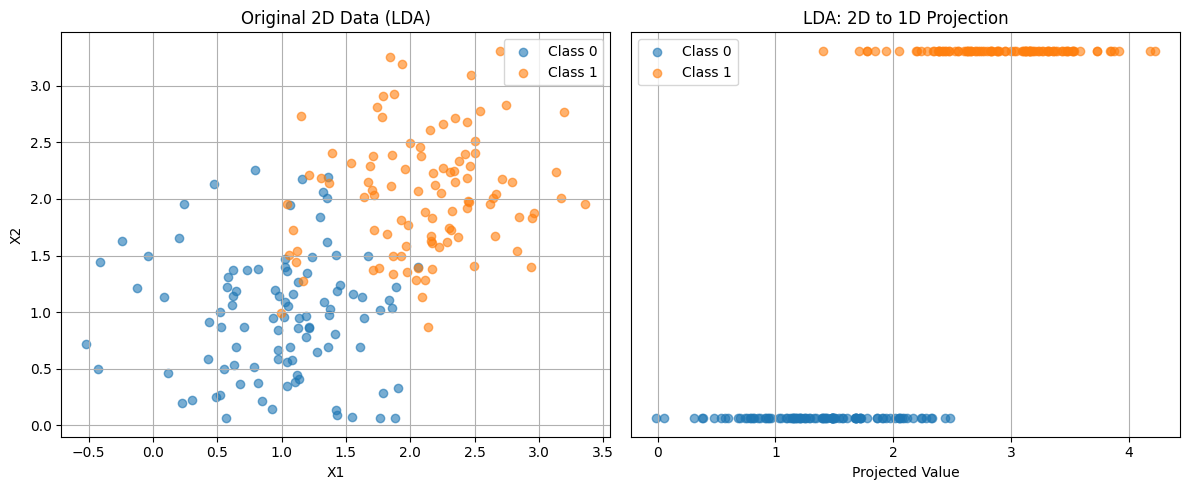

Accuracy with LDA: 92.5


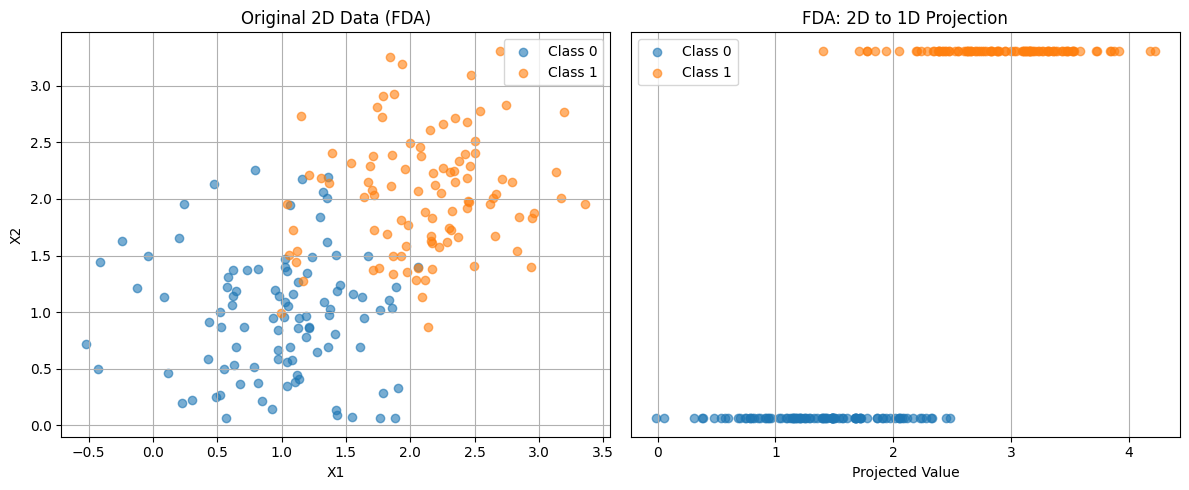

Accuracy with FDA: 92.5

Observations:
--------------------------------------------------
Accuracy with LDA (between-class only): 92.50%
Accuracy with FDA (between + within): 92.50%


In [3]:
########################################
# Part-2)-(a): Data generation
########################################

mean1 = [1, 1]
mean2 = [2, 2]
cov = [[0.3, 0], [0, 0.3]]

class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.vstack((class1_tr, class2_tr))
tr_targets = np.hstack((np.zeros(50), np.ones(50)))

class1_te = np.random.multivariate_normal(mean1, cov, 100)
class2_te = np.random.multivariate_normal(mean2, cov, 100)
te_data = np.vstack((class1_te, class2_te))
te_targets = np.hstack((np.zeros(100), np.ones(100)))

########################################
# Part-2)-(b): LDA (Only Between-class Covariance)
########################################
def LDA_classify(X_train, Y_train, X_test):
    mean0 = np.mean(X_train[Y_train == 0], axis=0)
    mean1 = np.mean(X_train[Y_train == 1], axis=0)

    w = mean1 - mean0
    w = w / np.linalg.norm(w)

    m0_proj = np.dot(w, mean0)
    m1_proj = np.dot(w, mean1)
    threshold = (m0_proj + m1_proj) / 2

    projections = np.dot(X_test, w)
    predictions = np.where(projections > threshold, 1, 0)

    return predictions, w

def LDA_project(w, X_test, Y_test):
    projections = np.dot(X_test, w)

    plt.figure(figsize=(12, 5))

    # Original 2D Data
    plt.subplot(1, 2, 1)
    plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], label='Class 0', alpha=0.6)
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label='Class 1', alpha=0.6)
    plt.title("Original 2D Data (LDA)")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)

    # Projected 1D Data
    plt.subplot(1, 2, 2)
    plt.scatter(projections[Y_test == 0], np.zeros_like(projections[Y_test == 0]), label='Class 0', alpha=0.6)
    plt.scatter(projections[Y_test == 1], np.ones_like(projections[Y_test == 1]), label='Class 1', alpha=0.6)
    plt.title("LDA: 2D to 1D Projection")
    plt.xlabel("Projected Value")
    plt.yticks([])
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Apply LDA
predictions_lda, w_lda = LDA_classify(tr_data, tr_targets, te_data)
acc_lda = np.mean(predictions_lda == te_targets)
LDA_project(w_lda, te_data, te_targets)
print('Accuracy with LDA:', acc_lda * 100)

########################################
# Part-2)-(c): FDA (Between + Within Class Covariance)
########################################
def FDA_classify(X_train, Y_train, X_test):
    mean0 = np.mean(X_train[Y_train == 0], axis=0)
    mean1 = np.mean(X_train[Y_train == 1], axis=0)

    S_w = np.cov(X_train[Y_train == 0].T) + np.cov(X_train[Y_train == 1].T)
    w = np.linalg.inv(S_w).dot(mean1 - mean0)
    w = w / np.linalg.norm(w)

    m0_proj = np.dot(w, mean0)
    m1_proj = np.dot(w, mean1)
    threshold = (m0_proj + m1_proj) / 2

    projections = np.dot(X_test, w)
    predictions = np.where(projections > threshold, 1, 0)

    return w, predictions

def FDA_project(w, X_test, Y_test):
    projections = np.dot(X_test, w)

    plt.figure(figsize=(12, 5))

    # Original 2D Data
    plt.subplot(1, 2, 1)
    plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], label='Class 0', alpha=0.6)
    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label='Class 1', alpha=0.6)
    plt.title("Original 2D Data (FDA)")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)

    # Projected 1D Data
    plt.subplot(1, 2, 2)
    plt.scatter(projections[Y_test == 0], np.zeros_like(projections[Y_test == 0]), label='Class 0', alpha=0.6)
    plt.scatter(projections[Y_test == 1], np.ones_like(projections[Y_test == 1]), label='Class 1', alpha=0.6)
    plt.title("FDA: 2D to 1D Projection")
    plt.xlabel("Projected Value")
    plt.yticks([])
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Apply FDA
w_fda, predictions_fda = FDA_classify(tr_data, tr_targets, te_data)
acc_fda = np.mean(predictions_fda == te_targets)
FDA_project(w_fda, te_data, te_targets)
print('Accuracy with FDA:', acc_fda * 100)

########################################
# Part-2)-(d): FDA from N-dim to K-dim
########################################
def FDA_project_K(X_train, Y_train, X_test, k):
    classes = np.unique(Y_train)
    means = [np.mean(X_train[Y_train == c], axis=0) for c in classes]
    overall_mean = np.mean(X_train, axis=0)

    # Between-class scatter
    S_b = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i, c in enumerate(classes):
        n_c = X_train[Y_train == c].shape[0]
        mean_diff = (means[i] - overall_mean).reshape(-1, 1)
        S_b += n_c * (mean_diff @ mean_diff.T)

    # Within-class scatter
    S_w = np.zeros((X_train.shape[1], X_train.shape[1]))
    for i, c in enumerate(classes):
        X_c = X_train[Y_train == c]
        S_w += np.cov(X_c.T) * (X_c.shape[0] - 1)

    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(S_w).dot(S_b))
    sorted_indices = np.argsort(-np.abs(eigvals))
    w = eigvecs[:, sorted_indices[:k]]
    return w

########################################
# Part-2)-(e): Observations
########################################
print("\nObservations:")
print("-" * 50)
print(f"Accuracy with LDA (between-class only): {acc_lda * 100:.2f}%")
print(f"Accuracy with FDA (between + within): {acc_fda * 100:.2f}%")

<b> Report your observations </b>

1. LDA and FDA both have very similar accuracy as both have similar direction of projection due to within the class covariance being a multiple of identity matrix.




<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


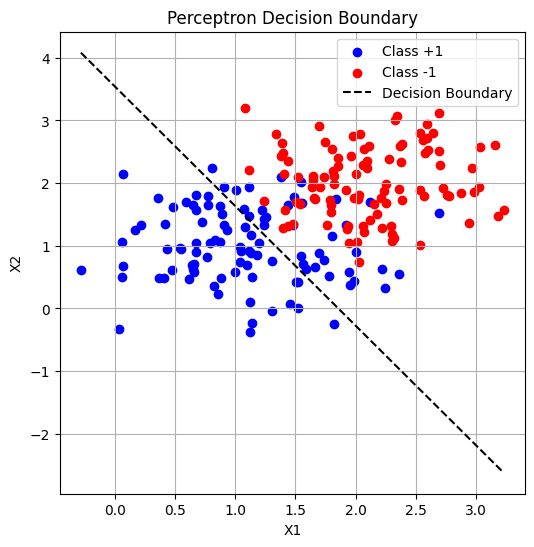

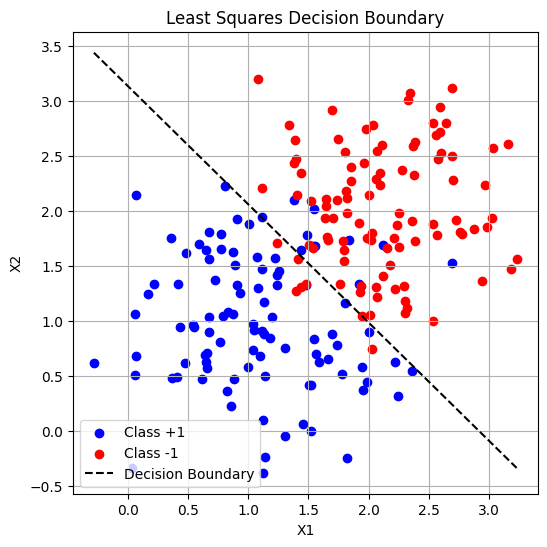

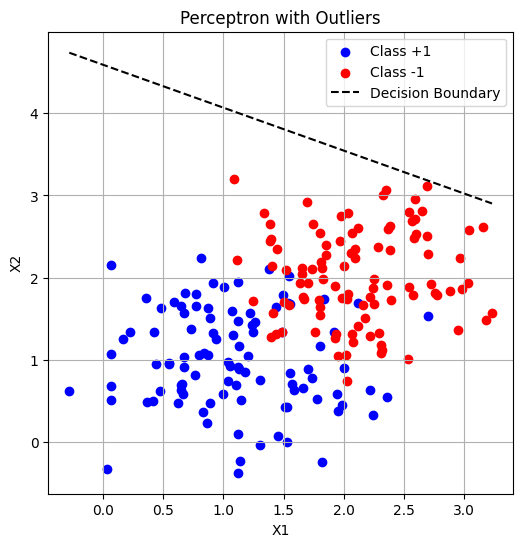

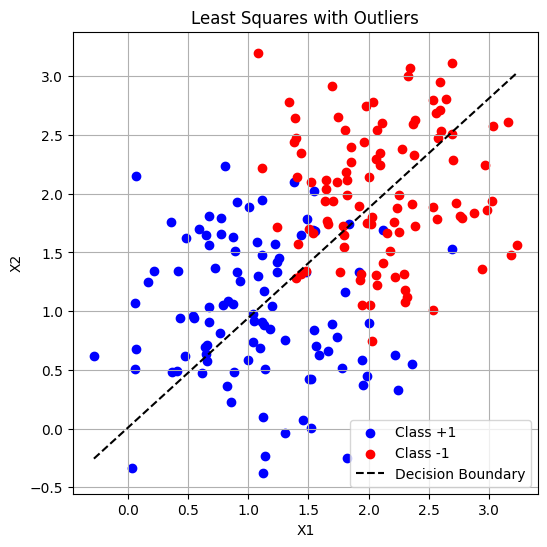

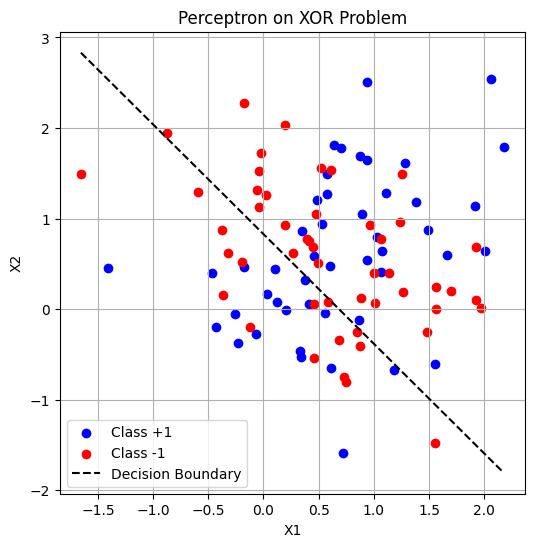

In [4]:
########################################
# Part-3)-(a): Data generation
########################################

mean1 = [1, 1]
mean2 = [2, 2]
cov = [[0.3, 0], [0, 0.3]]

# Training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.vstack((class1_tr, class2_tr))
tr_targets = np.hstack((np.ones(50), -1 * np.ones(50)))  # Perceptron prefers labels as +1 and -1

# Testing data
class1_te = np.random.multivariate_normal(mean1, cov, 100)
class2_te = np.random.multivariate_normal(mean2, cov, 100)
te_data = np.vstack((class1_te, class2_te))
te_targets = np.hstack((np.ones(100), -1 * np.ones(100)))

########################################
# Part-3)-(b): Perceptron
########################################
def Perceptron(X_train, Y_train, X_test, epochs=200):
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
    w = np.zeros(X.shape[1])

    for _ in range(epochs):
        for i in range(X.shape[0]):
            if Y_train[i] * np.dot(w, X[i]) <= 0:
                w += Y_train[i] * X[i]

    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    predictions = np.sign(X_test_bias @ w)

    return predictions, w

predictions_perceptron, w_perceptron = Perceptron(tr_data, tr_targets, te_data)

def plot_decision_boundary(w, X, Y, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='b', label='Class +1')
    plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], color='r', label='Class -1')
    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals = -(w[0] + w[1] * x_vals) / w[2]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(w_perceptron, te_data, te_targets, "Perceptron Decision Boundary")

##########################################
# Least Squares Classifier
##########################################
def least_squares(X_train, Y_train):
    X_aug = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    w = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ Y_train
    return w

w_ls = least_squares(tr_data, tr_targets)

X_aug_test = np.hstack((np.ones((te_data.shape[0], 1)), te_data))
pred_ls = np.sign(X_aug_test @ w_ls)

plot_decision_boundary(w_ls, te_data, te_targets, "Least Squares Decision Boundary")

##########################################
# Part-3)-(c): Outliers
##########################################
# Add true outliers to class 1
outliers = np.array([[40, 40], [45, 45]])
tr_data_with_outliers = np.vstack((tr_data, outliers))
tr_targets_with_outliers = np.append(tr_targets, [1, 1])

# Perceptron with outliers
pred_outlier, w_outlier = Perceptron(tr_data_with_outliers, tr_targets_with_outliers, te_data)
plot_decision_boundary(w_outlier, te_data, te_targets, "Perceptron with Outliers")

# Least Squares with outliers
w_ls_outlier = least_squares(tr_data_with_outliers, tr_targets_with_outliers)
plot_decision_boundary(w_ls_outlier, te_data, te_targets, "Least Squares with Outliers")

##########################################
# Part-3)-(d): XOR Dataset
##########################################
mean_00 = [0, 0]
mean_01 = [0, 1]
mean_10 = [1, 0]
mean_11 = [1, 1]
cov = [[0.3, 0], [0, 0.3]]

data_00 = np.random.multivariate_normal(mean_00, cov, 60)
data_11 = np.random.multivariate_normal(mean_11, cov, 60)
data_01 = np.random.multivariate_normal(mean_01, cov, 60)
data_10 = np.random.multivariate_normal(mean_10, cov, 60)

X = np.vstack((data_00, data_11, data_01, data_10))
Y = np.hstack((np.ones(120), -1 * np.ones(120)))  # XOR labels

indices = np.random.permutation(len(X))
split_point = int(0.6 * len(X))
X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
Y_train, Y_test = Y[indices[:split_point]], Y[indices[split_point:]]

pred_xor, w_xor = Perceptron(X_train, Y_train, X_test)
plot_decision_boundary(w_xor, X_test, Y_test, "Perceptron on XOR Problem")

<b> Report your observations </b>

1. Perceptron doe not converge as the data is not linearly separable data, whereas Least squares can approximate a boundary.

2. Least squares is very sensitive to the outliers and hence cannot find an approximate decion boundary.

3. Perceptron is unable to converge on the XOR dataset as the data is not linearly seperable.



<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




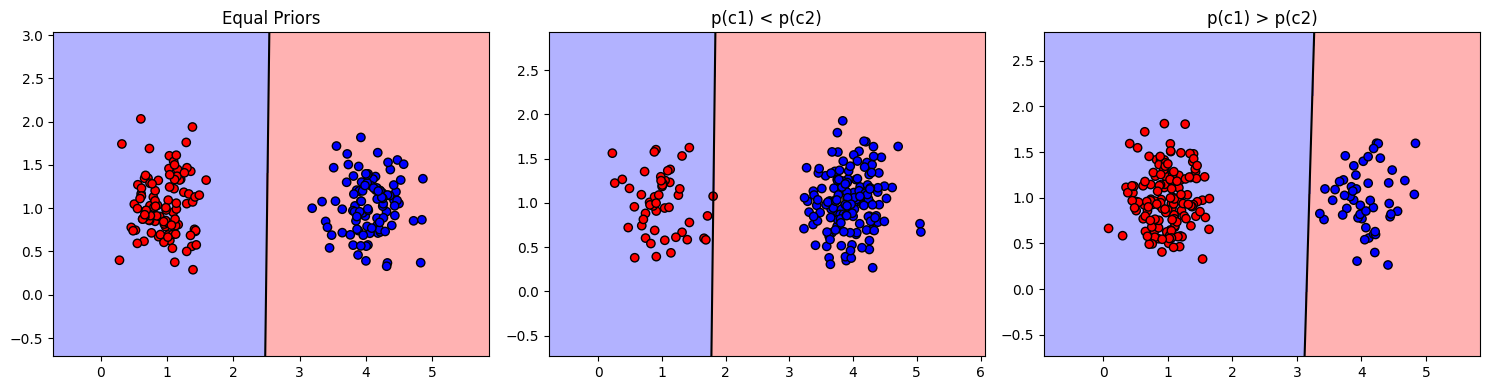

In [5]:
##########################################
# Part-4a: Same Covariance Case (Linear Boundary)
##########################################

m1 = [1, 1]
m2 = [4, 1]
cov = [[0.1, 0], [0, 0.1]]

# Case 1: Equal priors
data1 = np.random.multivariate_normal(m1, cov, 100)
data2 = np.random.multivariate_normal(m2, cov, 100)
labels1 = np.zeros(100)
labels2 = np.ones(100)
X1 = np.vstack((data1, data2))
Y1 = np.hstack((labels1, labels2))

# Case 2: p(c1) < p(c2)
data1 = np.random.multivariate_normal(m1, cov, 50)
data2 = np.random.multivariate_normal(m2, cov, 150)
labels1 = np.zeros(50)
labels2 = np.ones(150)
X2 = np.vstack((data1, data2))
Y2 = np.hstack((labels1, labels2))

# Case 3: p(c1) > p(c2)
data1 = np.random.multivariate_normal(m1, cov, 150)
data2 = np.random.multivariate_normal(m2, cov, 50)
labels1 = np.zeros(150)
labels2 = np.ones(50)
X3 = np.vstack((data1, data2))
Y3 = np.hstack((labels1, labels2))


def decisionBoundary_same_cov(X, Y):
    p_c1 = np.mean(Y == 0)
    p_c2 = 1.0 - p_c1
    mean_1 = np.mean(X[Y == 0], axis=0)
    mean_2 = np.mean(X[Y == 1], axis=0)
    cov = np.cov(X.T)

    cov_inv = np.linalg.inv(cov)
    w = np.dot(cov_inv, mean_1 - mean_2)
    w0 = -0.5 * np.dot(np.dot(mean_1, cov_inv), mean_1) + 0.5 * np.dot(np.dot(mean_2, cov_inv), mean_2) + math.log(p_c1 / p_c2)
    return w0, w


def plot_linear_decision_boundary(X, Y, title):
    w0, w = decisionBoundary_same_cov(X, Y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    zz = w0 + w[0] * xx + w[1] * yy

    plt.contourf(xx, yy, zz >= 0, alpha=0.3, cmap=ListedColormap(["red", "blue"]))
    plt.contour(xx, yy, zz, levels=[0], colors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=ListedColormap(["red", "blue"]), edgecolors='k')
    plt.title(title)


plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plot_linear_decision_boundary(X1, Y1, "Equal Priors")
plt.subplot(1, 3, 2)
plot_linear_decision_boundary(X2, Y2, "p(c1) < p(c2)")
plt.subplot(1, 3, 3)
plot_linear_decision_boundary(X3, Y3, "p(c1) > p(c2)")
plt.tight_layout()
plt.show()


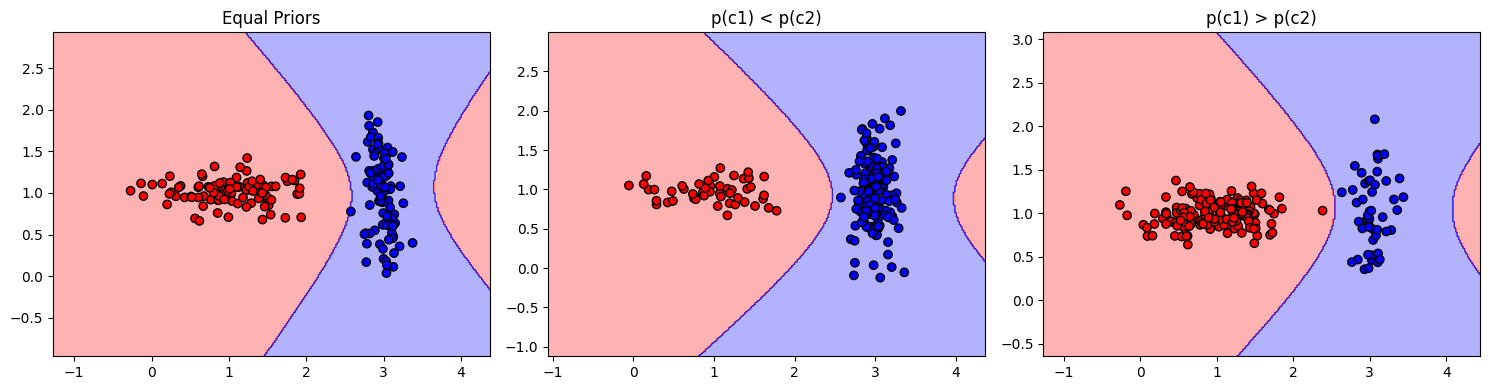

In [6]:
##########################################
# Part-4b: Different Covariances Case (Nonlinear Boundary)
##########################################

m1 = [1, 1]
m2 = [3, 1]
cov1 = [[0.2, 0], [0, 0.02]]
cov2 = [[0.02, 0], [0, 0.2]]

# Case 1
data1 = np.random.multivariate_normal(m1, cov1, 100)
data2 = np.random.multivariate_normal(m2, cov2, 100)
labels1 = np.zeros(100)
labels2 = np.ones(100)
X1 = np.vstack((data1, data2))
Y1 = np.hstack((labels1, labels2))

# Case 2
data1 = np.random.multivariate_normal(m1, cov1, 50)
data2 = np.random.multivariate_normal(m2, cov2, 150)
labels1 = np.zeros(50)
labels2 = np.ones(150)
X2 = np.vstack((data1, data2))
Y2 = np.hstack((labels1, labels2))

# Case 3
data1 = np.random.multivariate_normal(m1, cov1, 150)
data2 = np.random.multivariate_normal(m2, cov2, 50)
labels1 = np.zeros(150)
labels2 = np.ones(50)
X3 = np.vstack((data1, data2))
Y3 = np.hstack((labels1, labels2))


def compute_log_likelihood(x, mean, cov):
    cov_inv = np.linalg.inv(cov)
    diff = x - mean
    exponent = -0.5 * np.dot(np.dot(diff.T, cov_inv), diff)
    det = np.linalg.det(cov)
    norm_const = 1.0 / (2 * math.pi * math.sqrt(det))
    return exponent + math.log(norm_const)


def predict_nonlinear(X, X_train, Y_train):
    p_c1 = np.mean(Y_train == 0)
    p_c2 = 1.0 - p_c1
    mean_1 = np.mean(X_train[Y_train == 0], axis=0)
    mean_2 = np.mean(X_train[Y_train == 1], axis=0)
    cov1 = np.cov(X_train[Y_train == 0].T)
    cov2 = np.cov(X_train[Y_train == 1].T)

    predictions = []
    for x in X:
        ll1 = compute_log_likelihood(x, mean_1, cov1) + math.log(p_c1)
        ll2 = compute_log_likelihood(x, mean_2, cov2) + math.log(p_c2)
        predictions.append(0 if ll1 > ll2 else 1)
    return np.array(predictions)


def plot_nonlinear_decision_boundary(X, Y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = predict_nonlinear(grid, X, Y).reshape(xx.shape)

    plt.contourf(xx, yy, zz, alpha=0.3, cmap=ListedColormap(["red", "blue"]))
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=ListedColormap(["red", "blue"]), edgecolors='k')
    plt.title(title)


plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plot_nonlinear_decision_boundary(X1, Y1, "Equal Priors")
plt.subplot(1, 3, 2)
plot_nonlinear_decision_boundary(X2, Y2, "p(c1) < p(c2)")
plt.subplot(1, 3, 3)
plot_nonlinear_decision_boundary(X3, Y3, "p(c1) > p(c2)")
plt.tight_layout()
plt.show()


<b> Report your observations </b>

1. In the linear decision boundary case, the class with more prior would occupy the larger decision region of the 2.

2. Similar to the linear case in the non linear decision boundary case, the width of the seperating hypebola increases as prior for class 2 increases.


<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations




Accuracy with Logistic Regression (No Outliers): 0.94 




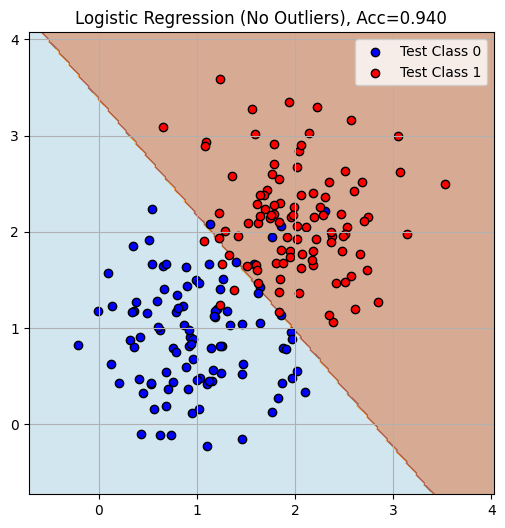



Accuracy with Logistic Regression (With Outliers): 0.935 




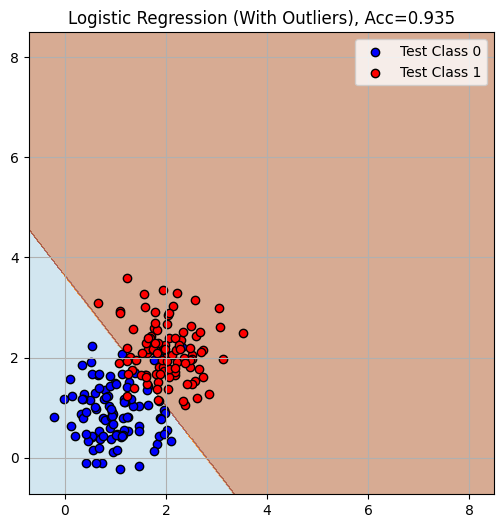



Accuracy with Least Squares (With Outliers): 0.905 




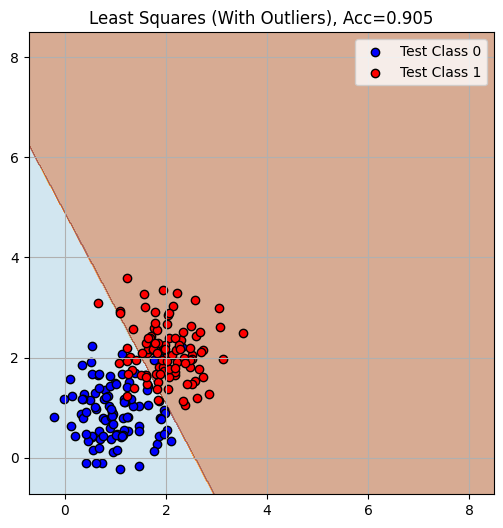


Observations:
1) Logistic Regression on clean data yields a clean decision boundary with high accuracy.
   Accuracy (No Outliers): 0.940
2) When outliers are introduced, the Logistic Regression boundary shifts only moderately,
   achieving an accuracy of: 0.935.
3) Least Squares, however, is significantly more affected by outliers, resulting in a much more skewed boundary.
   Accuracy (Least Squares with Outliers): 0.905


In [7]:
##################################################
# Part‑5)-1: Data Generation
##################################################
# Set parameters of the class distributions.
mean1 = [1, 1]        # Mean vector for class 1
mean2 = [2, 2]        # Mean vector for class 2
cov = [[0.3, 0], [0, 0.3]]  # Common covariance matrix

# Generate training data: 50 samples per class.
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.vstack((class1_tr, class2_tr))
tr_targets = np.hstack((np.zeros(50), np.ones(50)))  # Assign 0 to class1, 1 to class2

# Generate testing data: 100 samples per class.
class1_te = np.random.multivariate_normal(mean1, cov, 100)
class2_te = np.random.multivariate_normal(mean2, cov, 100)
te_data = np.vstack((class1_te, class2_te))
te_targets = np.hstack((np.zeros(100), np.ones(100)))

# some useful functions
def sigmoid(z):
    # Clip z to avoid overflow errors.
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

def LR_Accuracy(Y_true, Y_pred):
    return np.mean(Y_true == Y_pred)

##################################################
# Part‑5)-b: Logistic Regression
##################################################
def Logistic_Regression(X_train, Y_train, X_test, max_iter=100):
    """
    Trains logistic regression using IRLS with L2 regularization.

    Inputs:
      X_train  : Training data (without bias)
      Y_train  : Training labels
      X_test   : Testing data (without bias) to later predict
      max_iter : Maximum number of iterations for IRLS updates

    Outputs:
      Predictions on X_test based on the learned weight vector w.
    """
    X_aug = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    w = np.zeros(X_aug.shape[1])

    for _ in range(max_iter):
        preds = sigmoid(X_aug @ w)
        R = np.diag(preds * (1 - preds))
        H = X_aug.T @ R @ X_aug  # Removed regularization
        grad = X_aug.T @ (Y_train - preds)  # Removed regularization
        w += np.linalg.pinv(H) @ grad

    X_test_aug = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    test_probs = sigmoid(X_test_aug @ w)
    test_preds = (test_probs >= 0.5).astype(int)
    return test_preds, w

# Train and predict on the clean data.
Y_pred, w_final = Logistic_Regression(tr_data, tr_targets, te_data)
acc_no_outliers = LR_Accuracy(te_targets, Y_pred)
print("\n\nAccuracy with Logistic Regression (No Outliers):", acc_no_outliers, "\n\n")

##################################################
# Part‑5)-d: Plot Decision Regions
##################################################
def plot_decision_boundary(X_plot, Y_plot, w, title, train_data=None):
    """
    Plots decision regions based on a learned weight vector w.

    Inputs:
      X_plot    : Data to overlay (usually test data)
      Y_plot    : Corresponding labels
      w         : Learned weight vector (including bias)
      title     : Plot title (can include accuracy)
      train_data: Optional training data to determine grid limits.
    """
    h = 0.02
    # Set grid limits – if train_data is provided, use union of test and train data.
    if train_data is not None:
        combined = np.vstack((X_plot, train_data))
        x_min, x_max = combined[:, 0].min() - 0.5, combined[:, 0].max() + 0.5
        y_min, y_max = combined[:, 1].min() - 0.5, combined[:, 1].max() + 0.5
    else:
        x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
        y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Predict class labels on the grid.
    Z = logistic_regression_predict(grid, w).reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
    plt.scatter(X_plot[Y_plot==0][:, 0], X_plot[Y_plot==0][:, 1],
                c='blue', edgecolors='k', label='Test Class 0')
    plt.scatter(X_plot[Y_plot==1][:, 0], X_plot[Y_plot==1][:, 1],
                c='red', edgecolors='k', label='Test Class 1')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def logistic_regression_predict(X, w):
    X_aug = np.hstack((np.ones((X.shape[0], 1)), X))
    probs = sigmoid(X_aug @ w)
    return (probs >= 0.5).astype(int)

# Plot decision boundary for clean data.
title_no_outliers = f"Logistic Regression (No Outliers), Acc={acc_no_outliers:.3f}"
plot_decision_boundary(te_data, te_targets, w_final, title_no_outliers)

##################################################
# Part‑5)-e: Logistic Regression for Data with Outliers
##################################################
# Introduce genuine outliers to class 0.
outliers = np.array([[6, 6], [8, 8]])
tr_data_out = np.vstack((tr_data, outliers))
tr_targets_out = np.append(tr_targets, [0, 0])

# Train logistic regression on the outlier-augmented training set.
Y_pred_out, w_outlier = Logistic_Regression(tr_data_out, tr_targets_out, te_data)
acc_with_outliers = LR_Accuracy(te_targets, Y_pred_out)
print("\n\nAccuracy with Logistic Regression (With Outliers):", acc_with_outliers, "\n\n")

title_with_outliers = f"Logistic Regression (With Outliers), Acc={acc_with_outliers:.3f}"
plot_decision_boundary(te_data, te_targets, w_outlier, title_with_outliers, train_data=tr_data_out)

# Least Squares Classification on data with outliers.
def least_squares_train(X_train, Y_train):
    X_aug = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    return np.linalg.pinv(X_aug.T @ X_aug) @ (X_aug.T @ Y_train)

def ls_predict(X, w):
    X_aug = np.hstack((np.ones((X.shape[0], 1)), X))
    return (X_aug @ w >= 0.5).astype(int)

def plot_decision_boundary_ls(X_plot, Y_plot, w, title, train_data=None):
    h = 0.02
    if train_data is not None:
        combined = np.vstack((X_plot, train_data))
        x_min, x_max = combined[:, 0].min() - 0.5, combined[:, 0].max() + 0.5
        y_min, y_max = combined[:, 1].min() - 0.5, combined[:, 1].max() + 0.5
    else:
        x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
        y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = ls_predict(grid, w).reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
    plt.scatter(X_plot[Y_plot == 0][:, 0], X_plot[Y_plot == 0][:, 1],
                c='blue', edgecolors='k', label='Test Class 0')
    plt.scatter(X_plot[Y_plot == 1][:, 0], X_plot[Y_plot == 1][:, 1],
                c='red', edgecolors='k', label='Test Class 1')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Train Least Squares classifier on the outlier-augmented training data.
w_ls_outlier = least_squares_train(tr_data_out, tr_targets_out)
y_pred_ls = ls_predict(te_data, w_ls_outlier)
acc_ls_outliers = LR_Accuracy(te_targets, y_pred_ls)
print("\n\nAccuracy with Least Squares (With Outliers):", acc_ls_outliers, "\n\n")

title_ls_outliers = f"Least Squares (With Outliers), Acc={acc_ls_outliers:.3f}"
plot_decision_boundary_ls(te_data, te_targets, w_ls_outlier, title_ls_outliers, train_data=tr_data_out)

##################################################
# Part‑5)-f: Final Observations
##################################################
print("\nObservations:")
print("1) Logistic Regression on clean data yields a clean decision boundary with high accuracy.")
print(f"   Accuracy (No Outliers): {acc_no_outliers:.3f}")
print("2) When outliers are introduced, the Logistic Regression boundary shifts only moderately,")
print(f"   achieving an accuracy of: {acc_with_outliers:.3f}.")
print("3) Least Squares, however, is significantly more affected by outliers, resulting in a much more skewed boundary.")
print(f"   Accuracy (Least Squares with Outliers): {acc_ls_outliers:.3f}")


<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


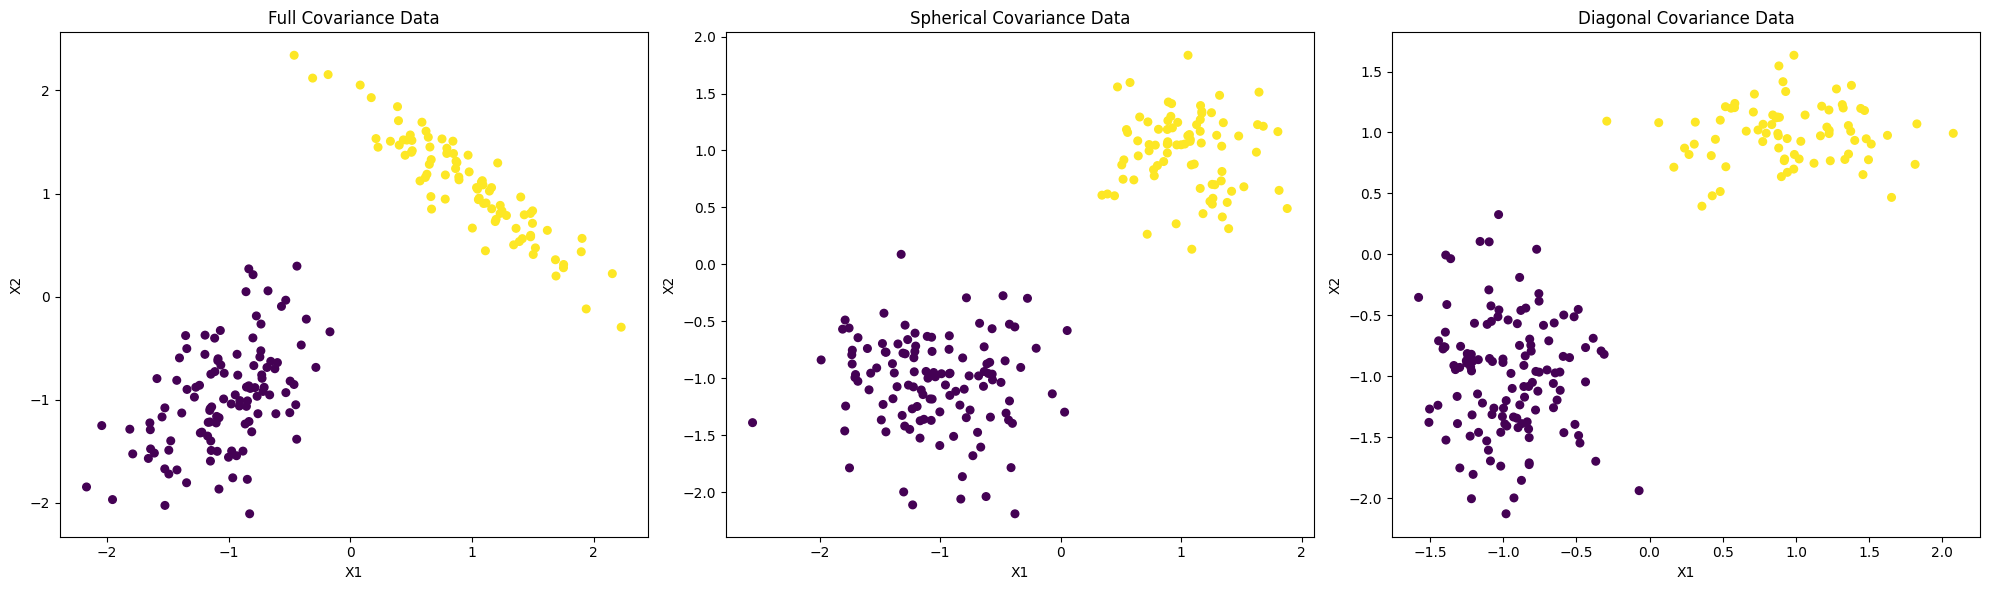


--- EM with Different Initializations (Full Covariance) ---

Running EM with init seed 0...
Iteration 0, Log-Likelihood: -511.766


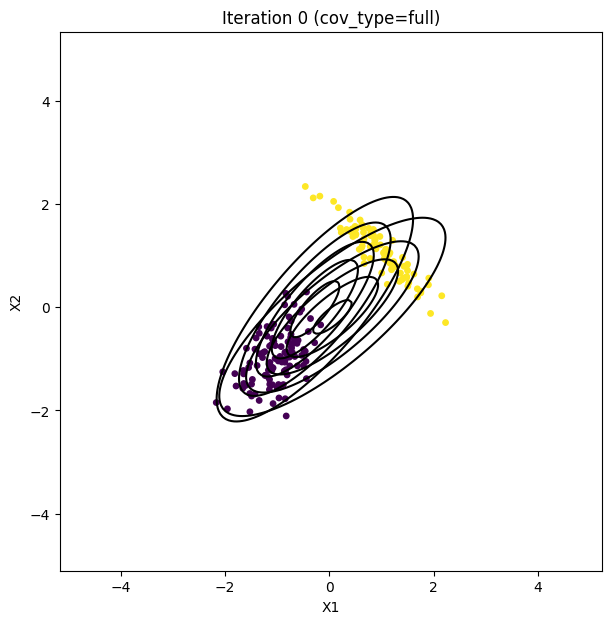

Iteration 1, Log-Likelihood: -505.849


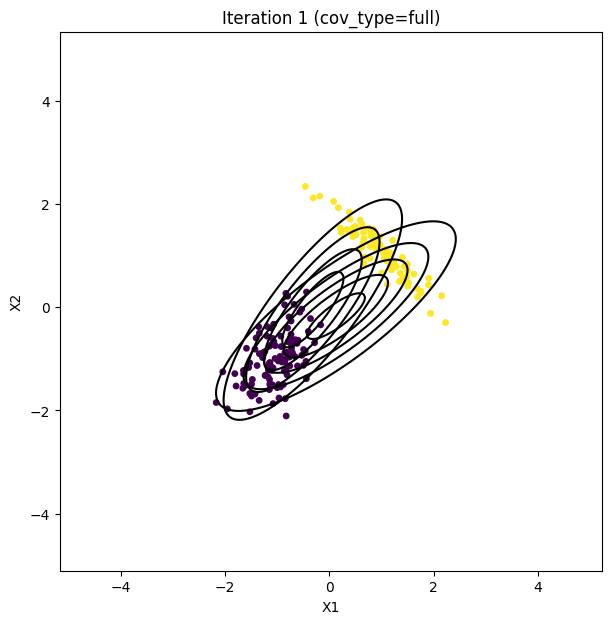

Iteration 2, Log-Likelihood: -501.994


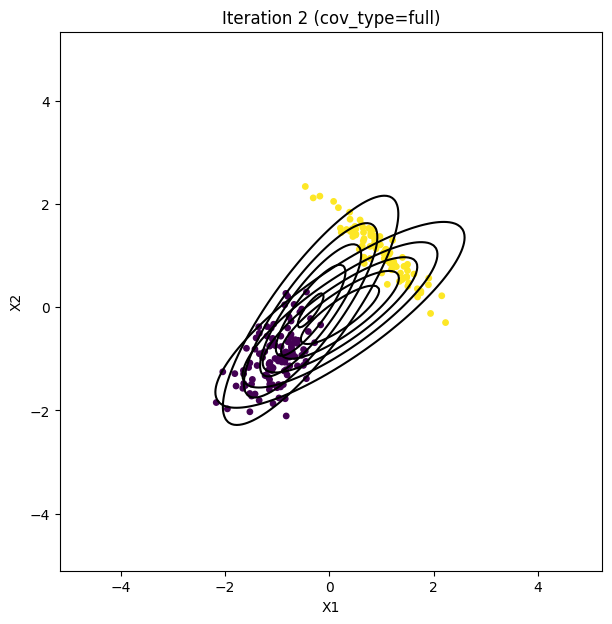

Iteration 3, Log-Likelihood: -500.354


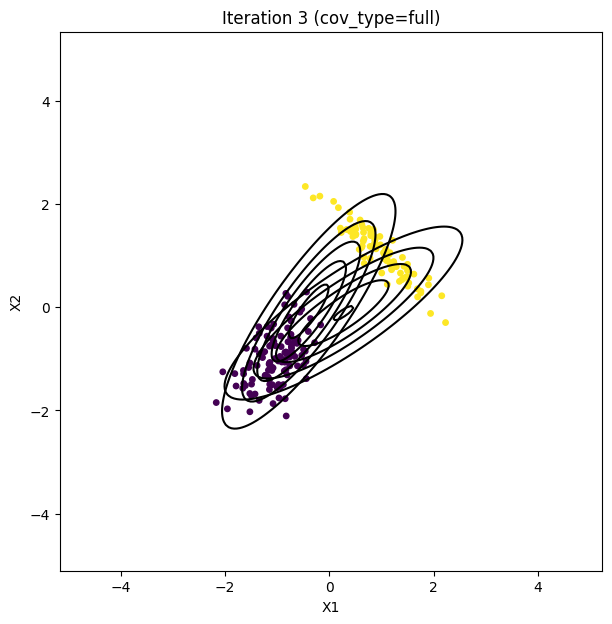

Iteration 4, Log-Likelihood: -499.740


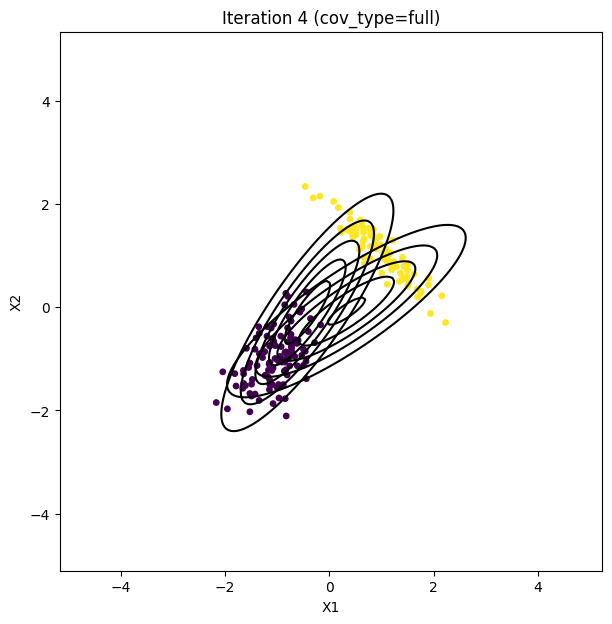

Iteration 5, Log-Likelihood: -499.368


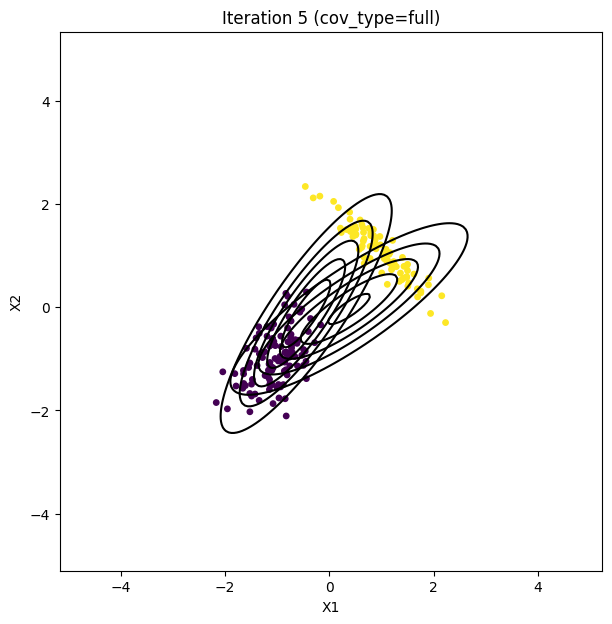

Iteration 6, Log-Likelihood: -499.000


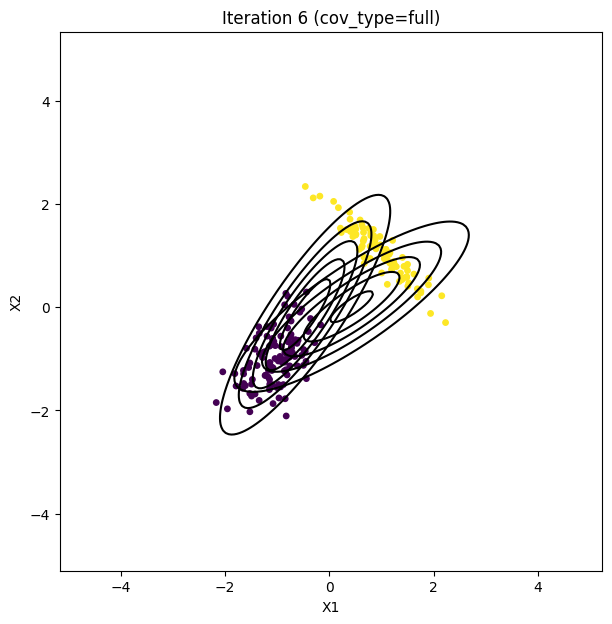

Iteration 7, Log-Likelihood: -498.565


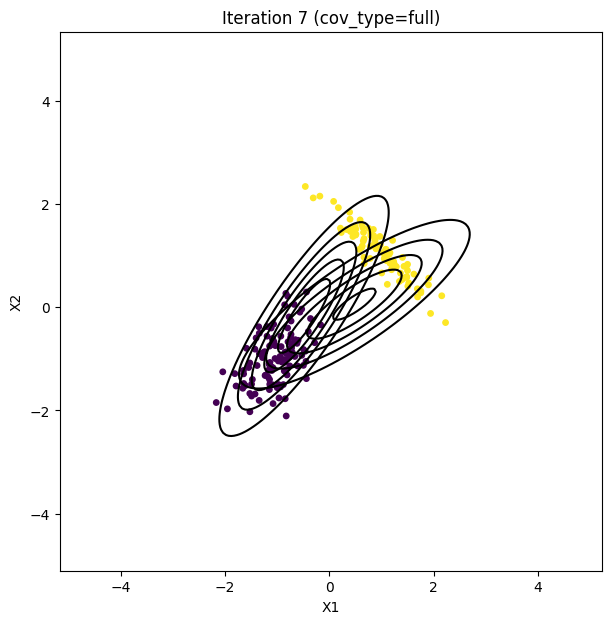

Iteration 8, Log-Likelihood: -498.009


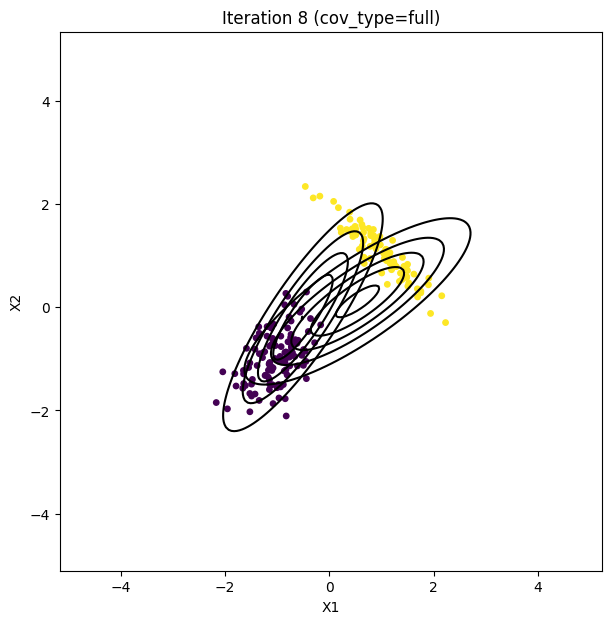

Iteration 9, Log-Likelihood: -497.237


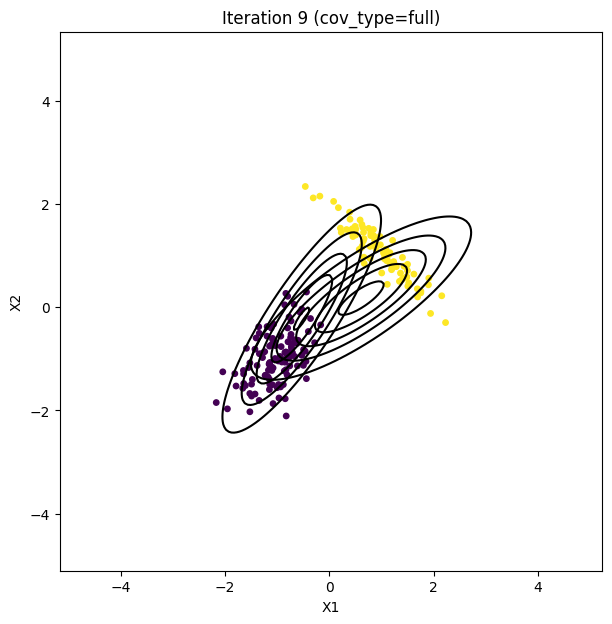


Running EM with init seed 42...
Iteration 0, Log-Likelihood: -398.005


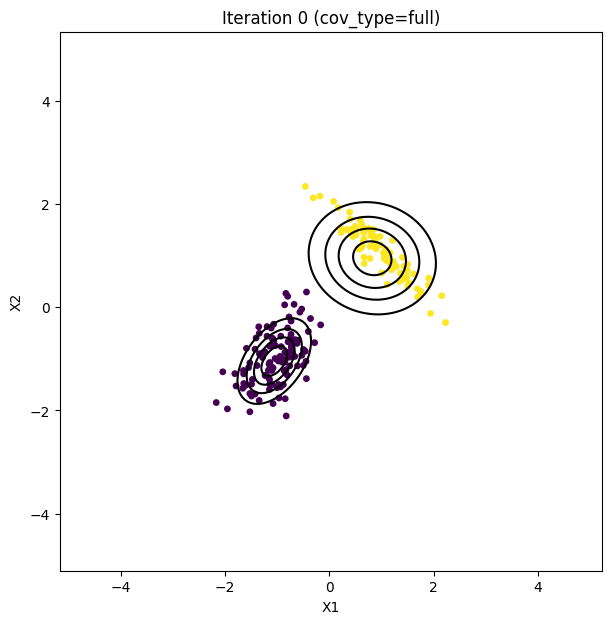

Iteration 1, Log-Likelihood: -337.978


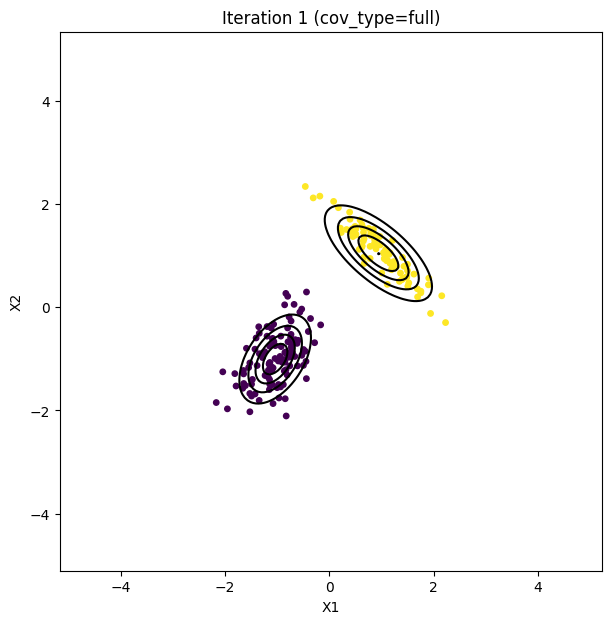

Iteration 2, Log-Likelihood: -304.941


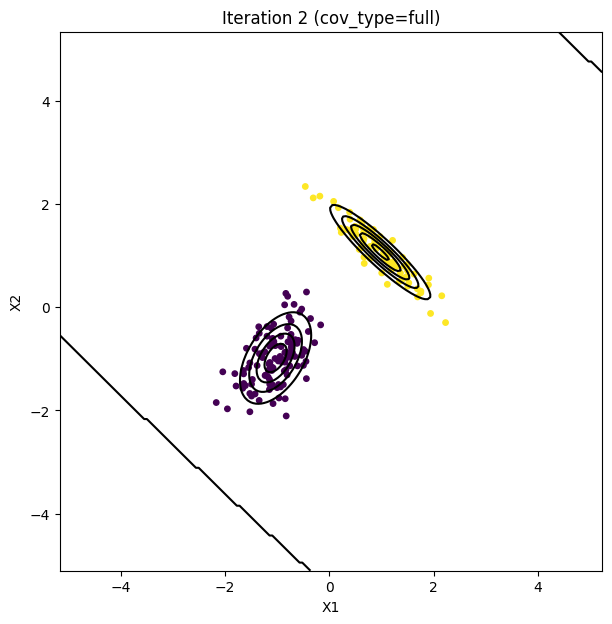

Iteration 3, Log-Likelihood: -304.941


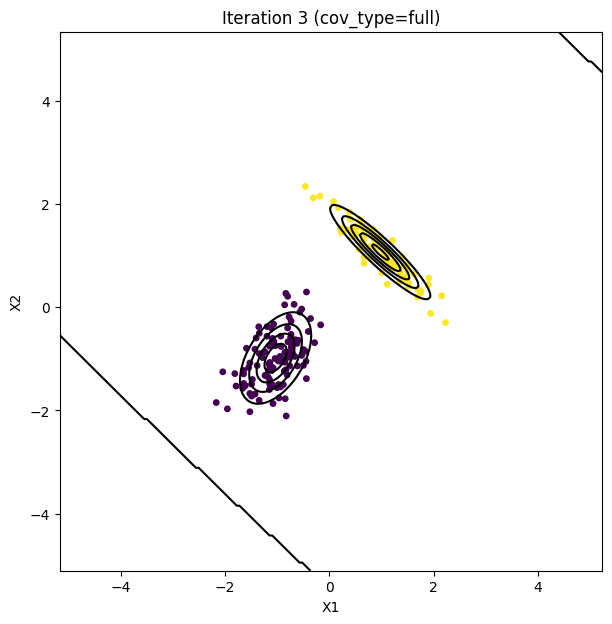

Iteration 4, Log-Likelihood: -304.941


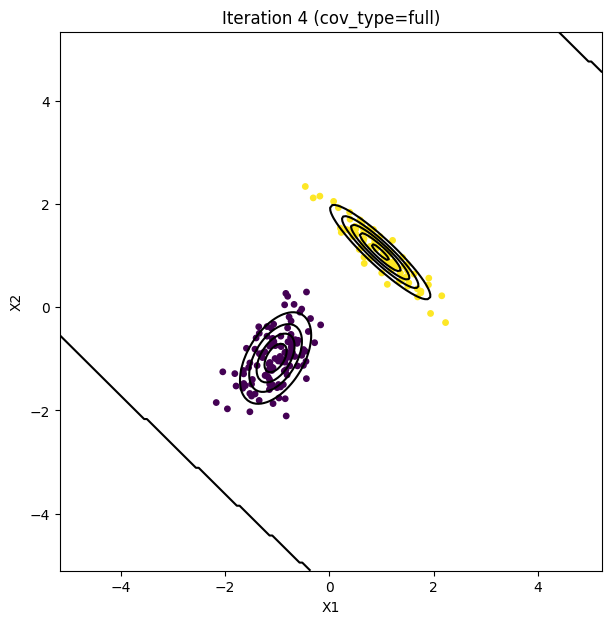

Iteration 5, Log-Likelihood: -304.941


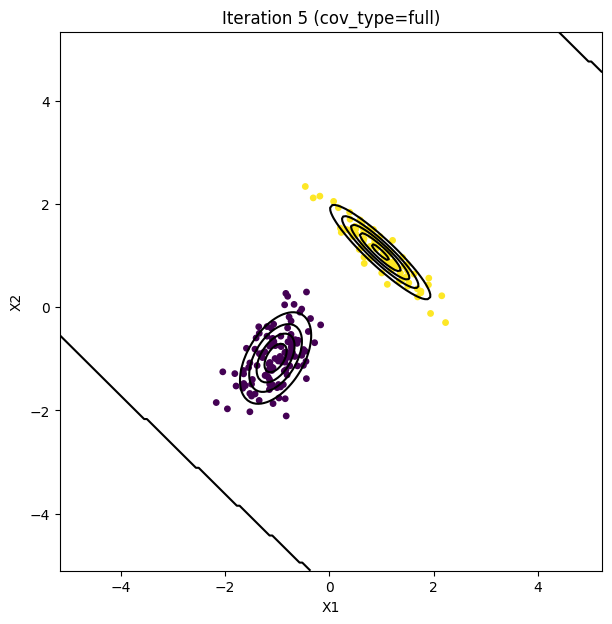

Iteration 6, Log-Likelihood: -304.941


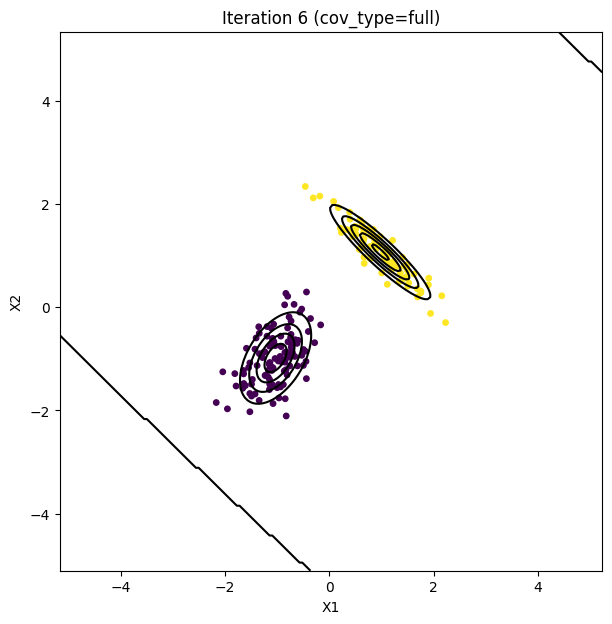

Iteration 7, Log-Likelihood: -304.941


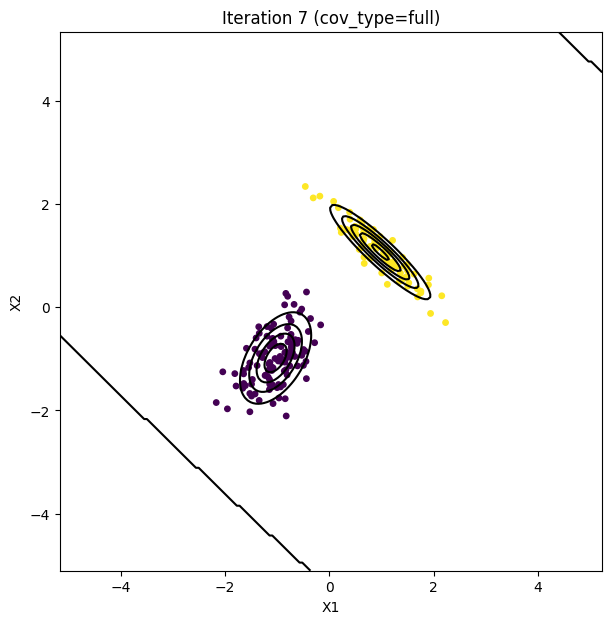

Iteration 8, Log-Likelihood: -304.941


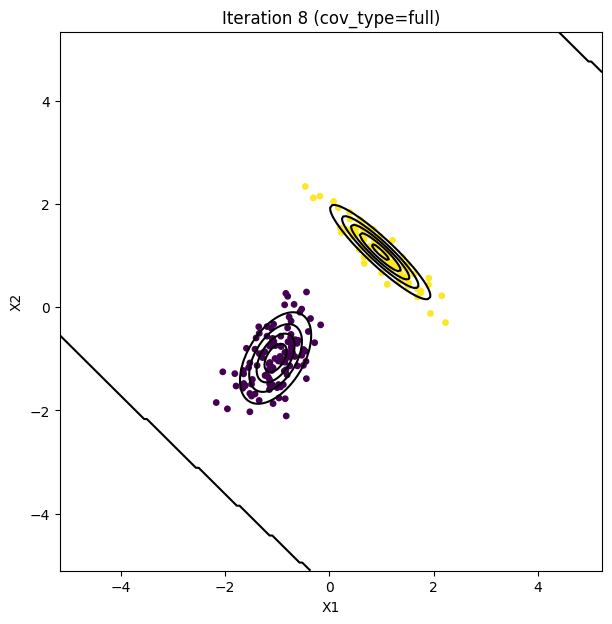

Iteration 9, Log-Likelihood: -304.941


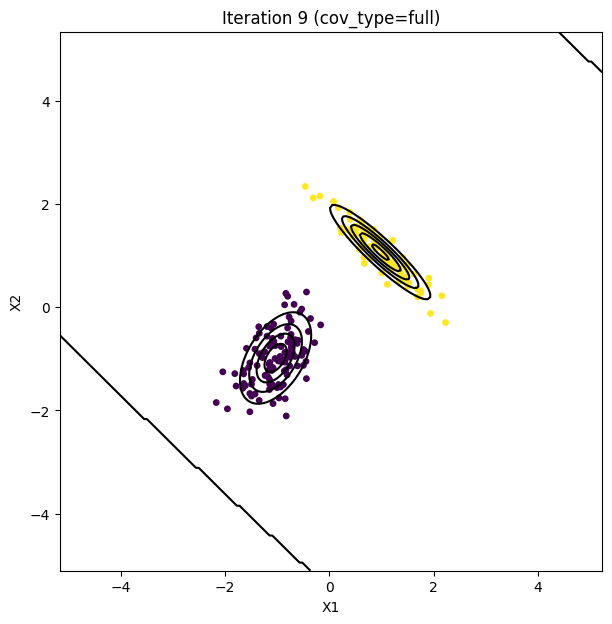


Running EM with init seed 100...
Iteration 0, Log-Likelihood: -406.251


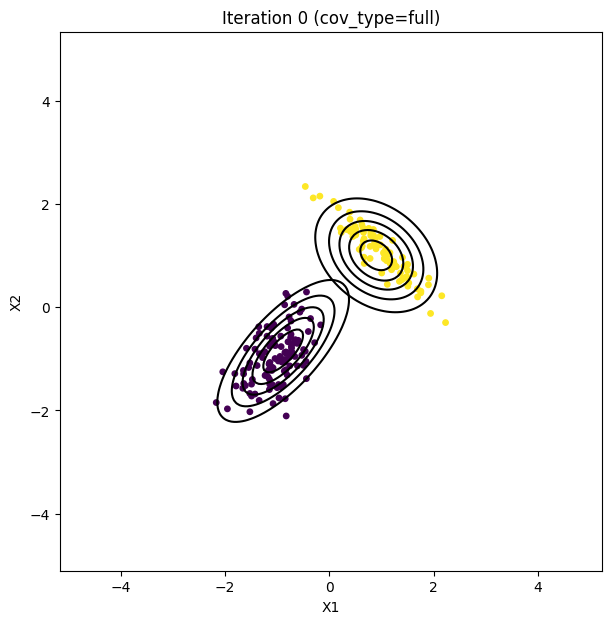

Iteration 1, Log-Likelihood: -306.779


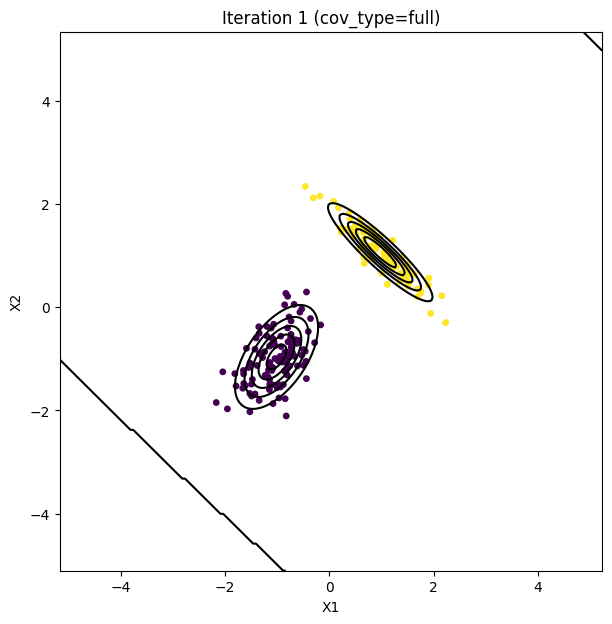

Iteration 2, Log-Likelihood: -304.941


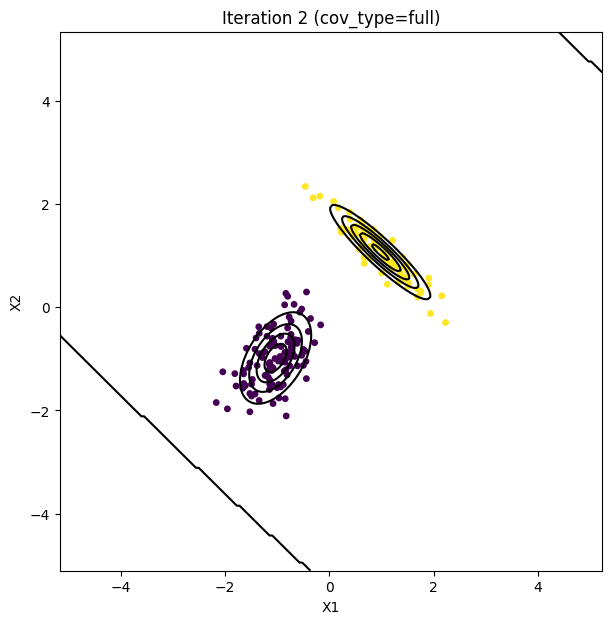

Iteration 3, Log-Likelihood: -304.941


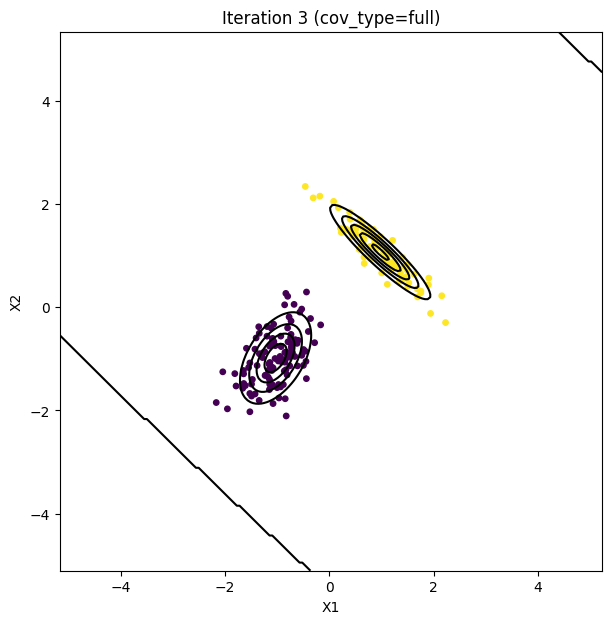

Iteration 4, Log-Likelihood: -304.941


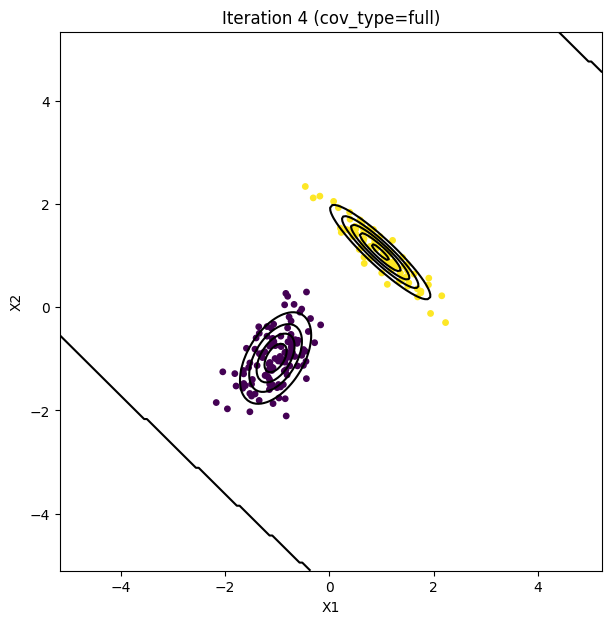

Iteration 5, Log-Likelihood: -304.941


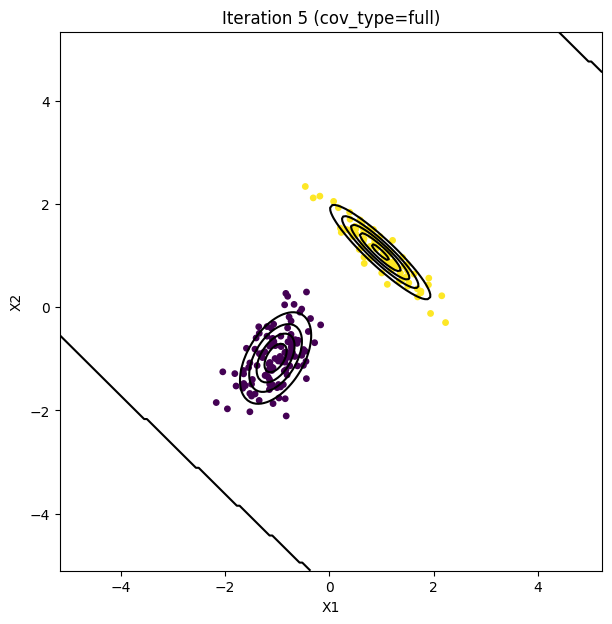

Iteration 6, Log-Likelihood: -304.941


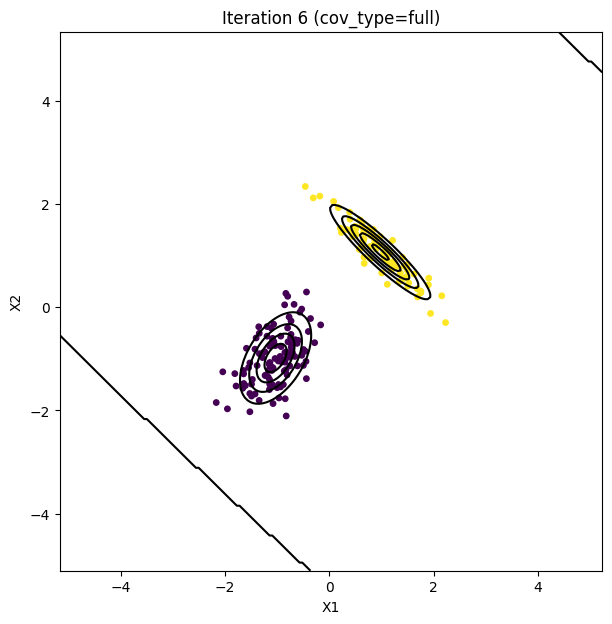

Iteration 7, Log-Likelihood: -304.941


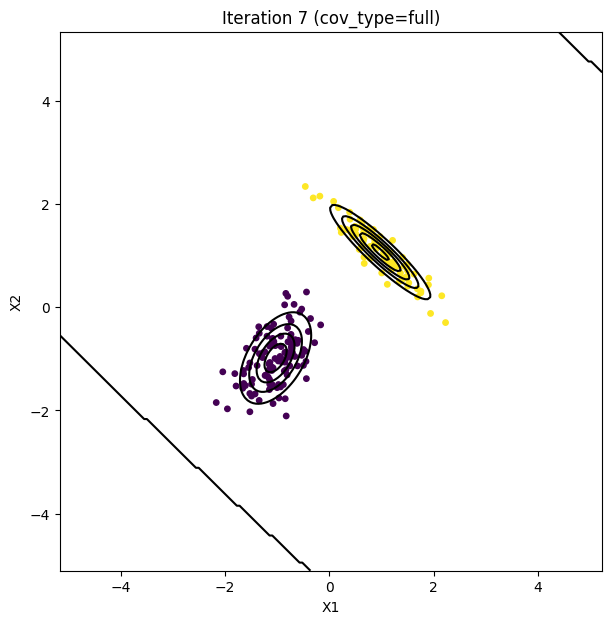

Iteration 8, Log-Likelihood: -304.941


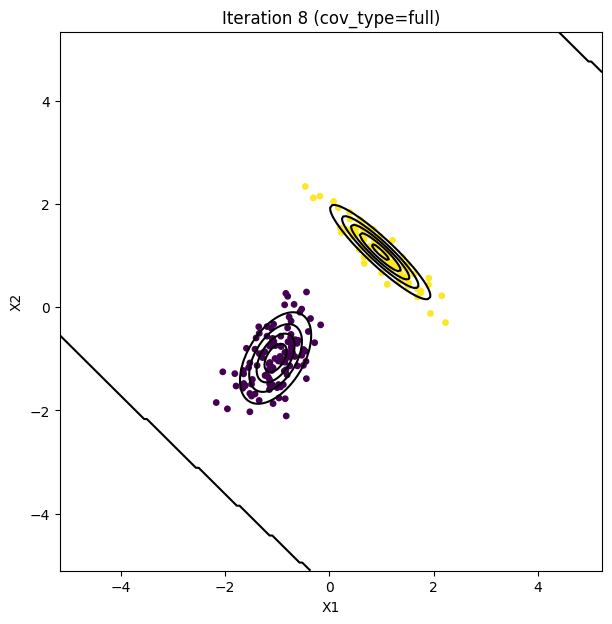

Iteration 9, Log-Likelihood: -304.941


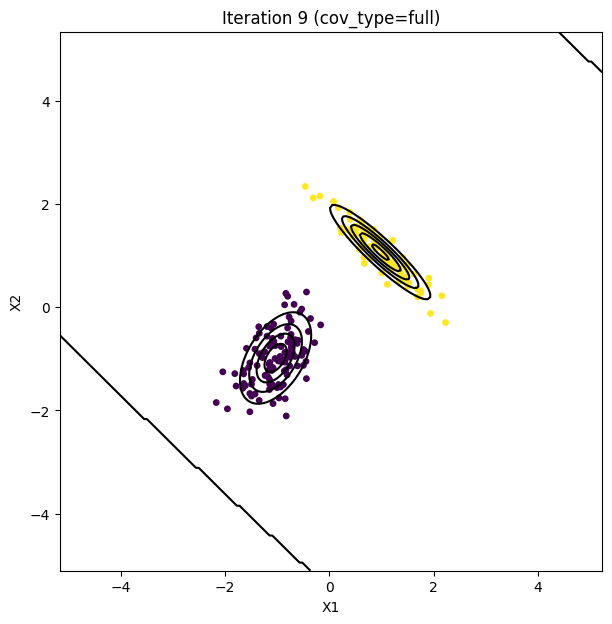

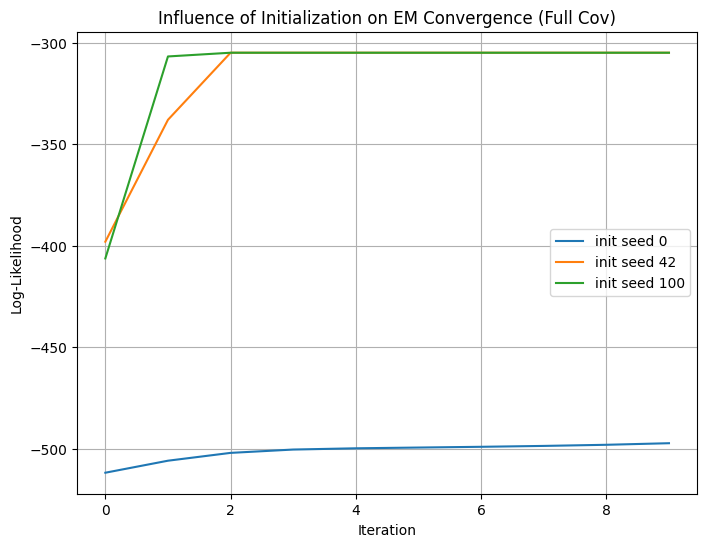


--- EM with Different Covariance Types ---

Running EM with covariance type: full
Iteration 0, Log-Likelihood: -398.005


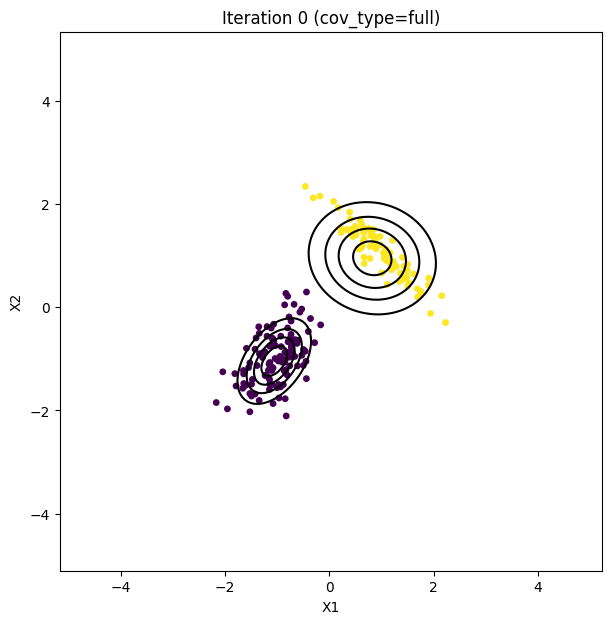

Iteration 1, Log-Likelihood: -337.978


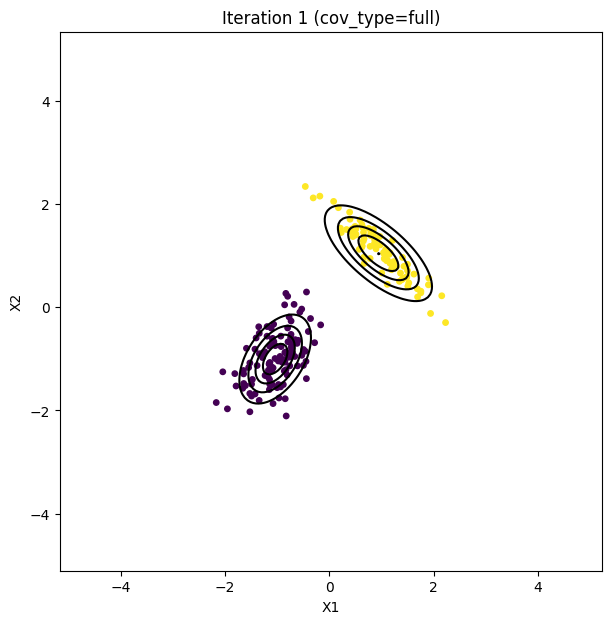

Iteration 2, Log-Likelihood: -304.941


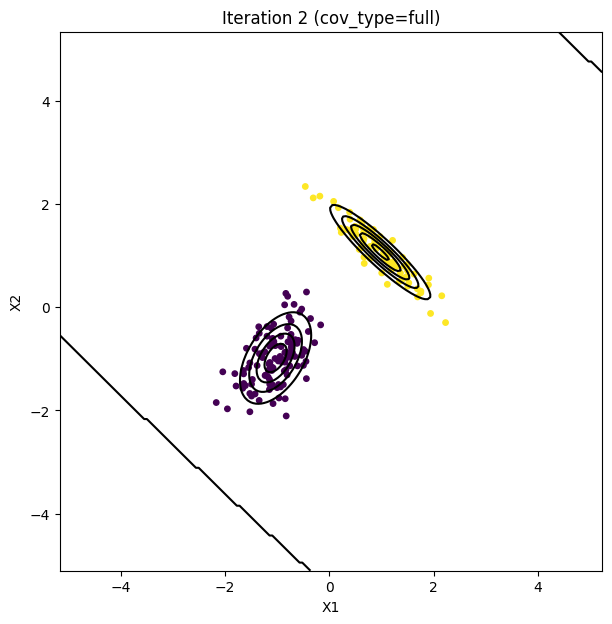

Iteration 3, Log-Likelihood: -304.941


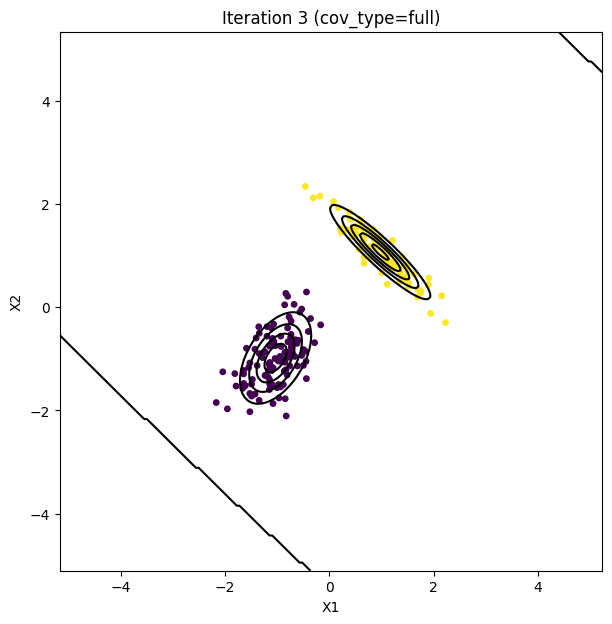

Iteration 4, Log-Likelihood: -304.941


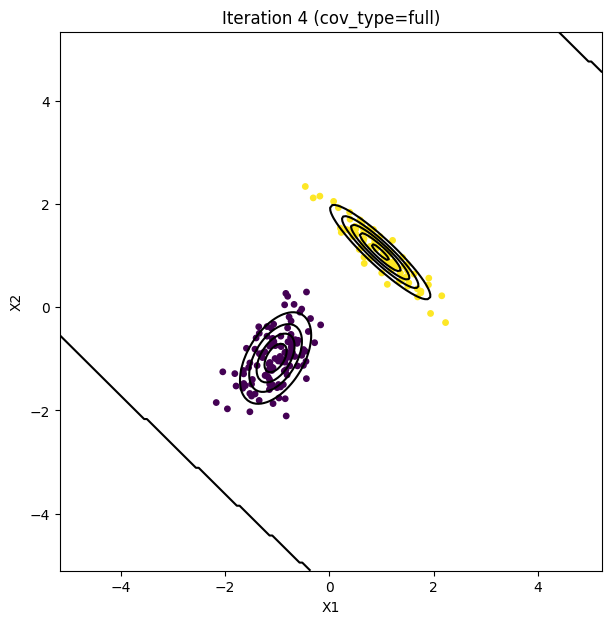

Iteration 5, Log-Likelihood: -304.941


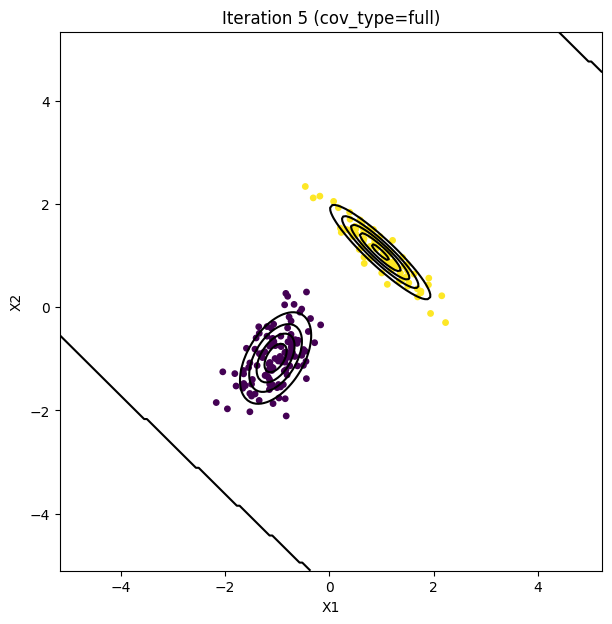

Iteration 6, Log-Likelihood: -304.941


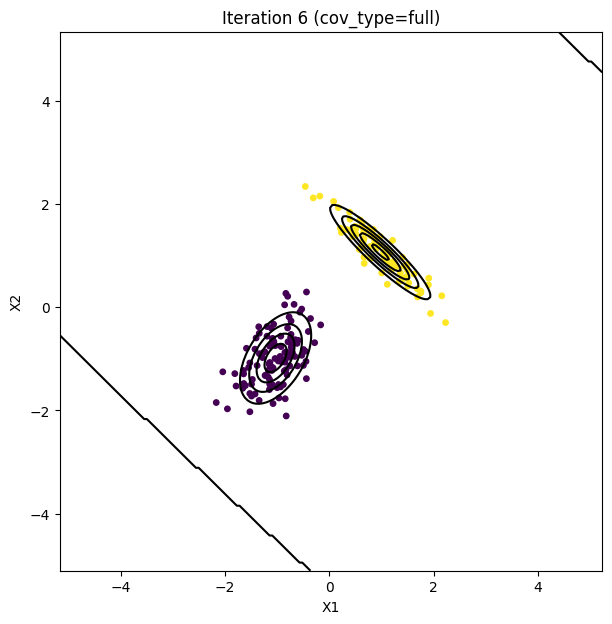

Iteration 7, Log-Likelihood: -304.941


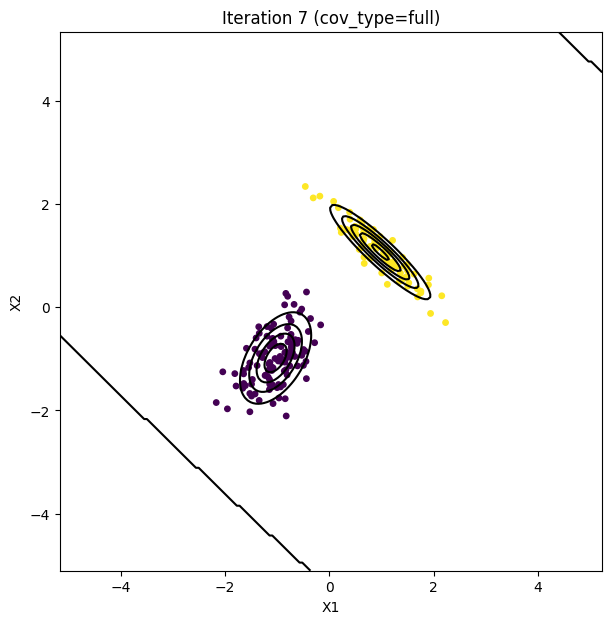

Iteration 8, Log-Likelihood: -304.941


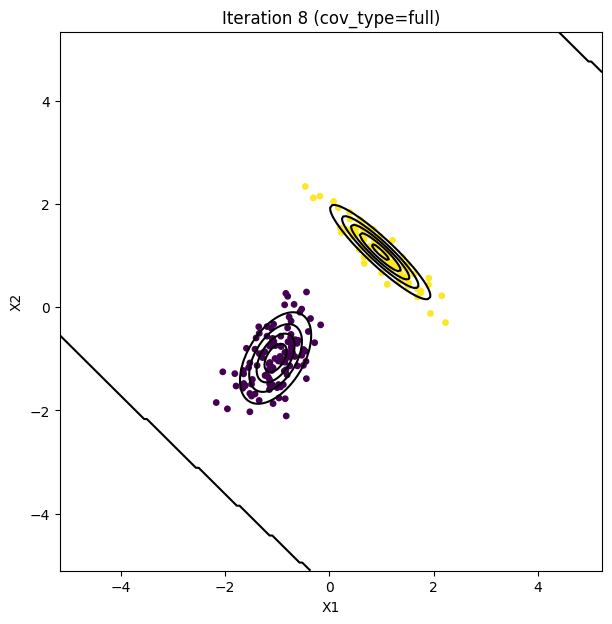

Iteration 9, Log-Likelihood: -304.941


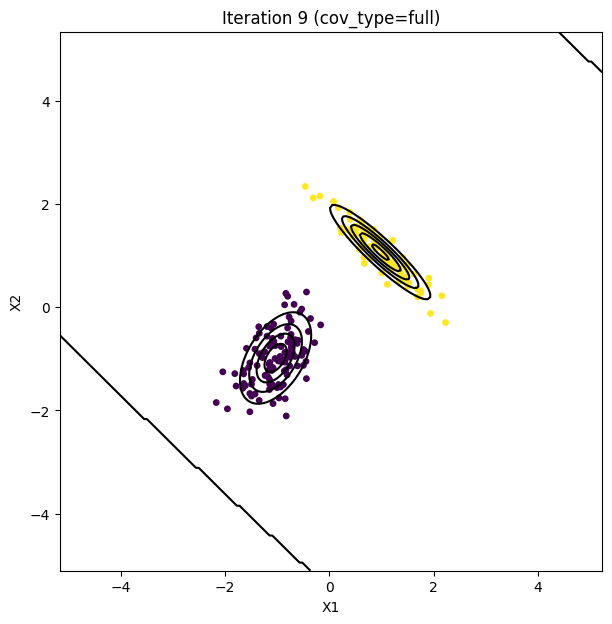


Running EM with covariance type: diagonal
Iteration 0, Log-Likelihood: -559.414


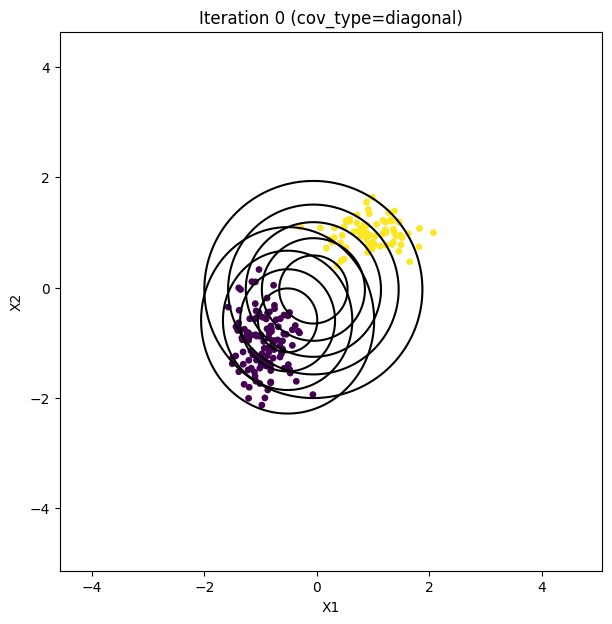

Iteration 1, Log-Likelihood: -505.348


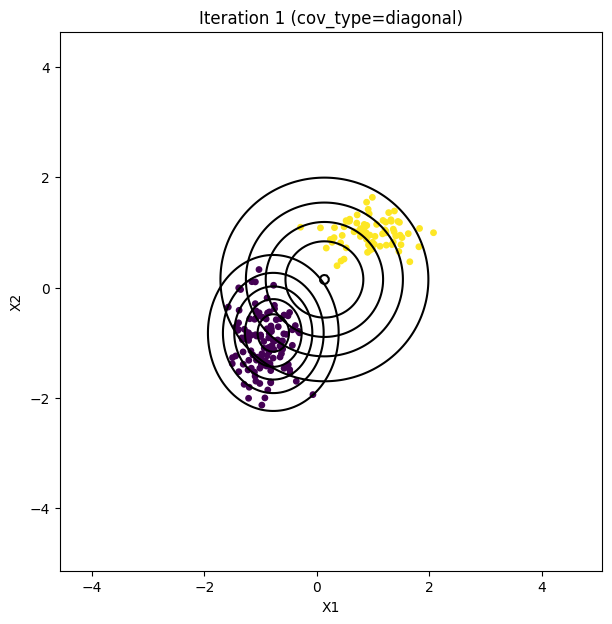

Iteration 2, Log-Likelihood: -397.408


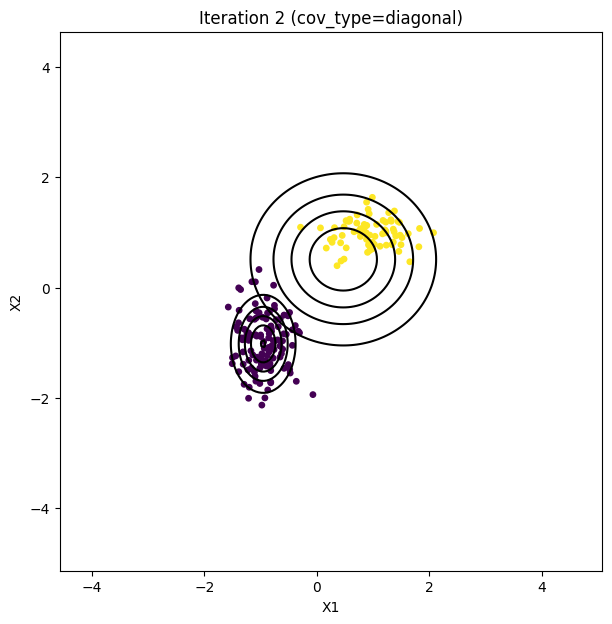

Iteration 3, Log-Likelihood: -334.612


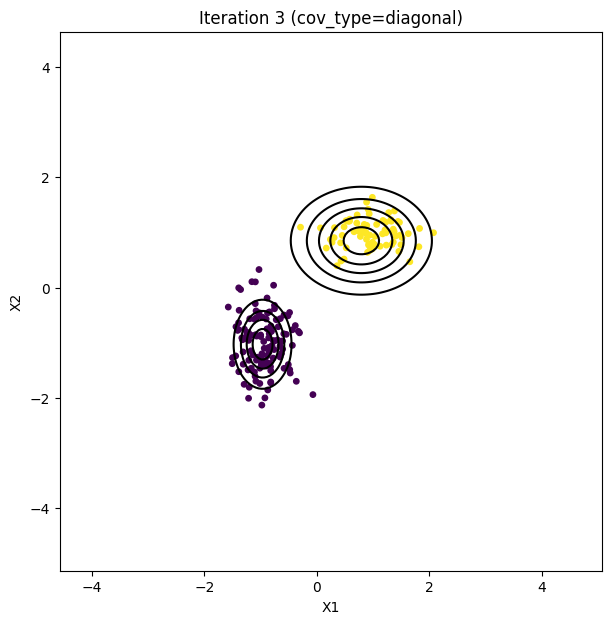

Iteration 4, Log-Likelihood: -290.333


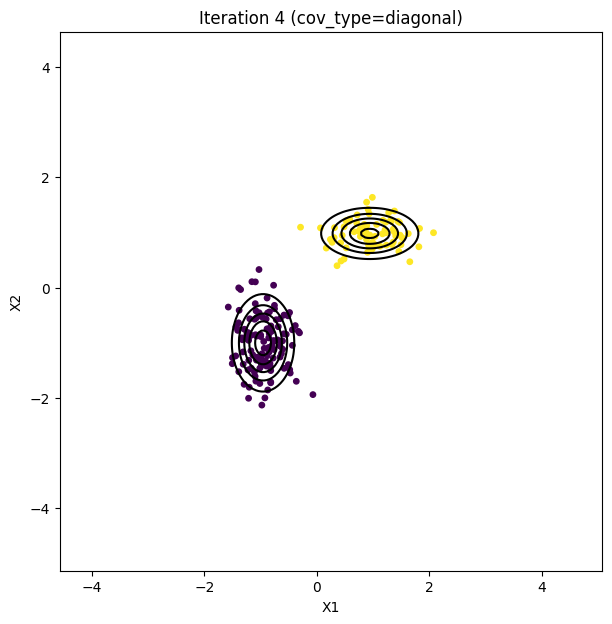

Iteration 5, Log-Likelihood: -289.763


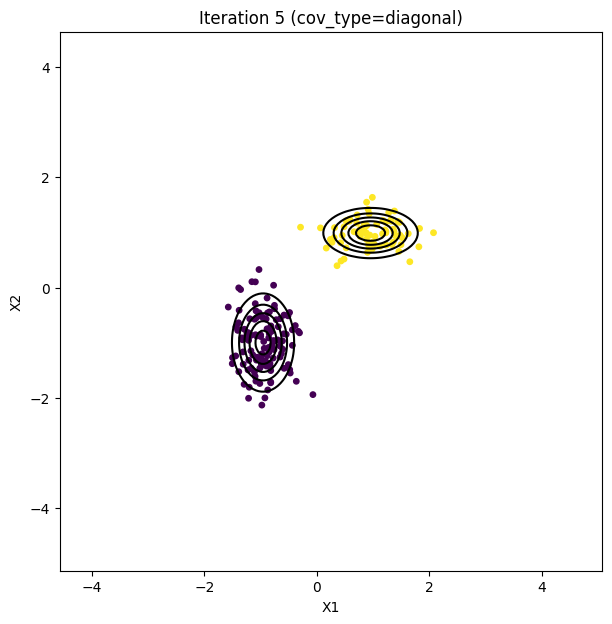

Iteration 6, Log-Likelihood: -289.763


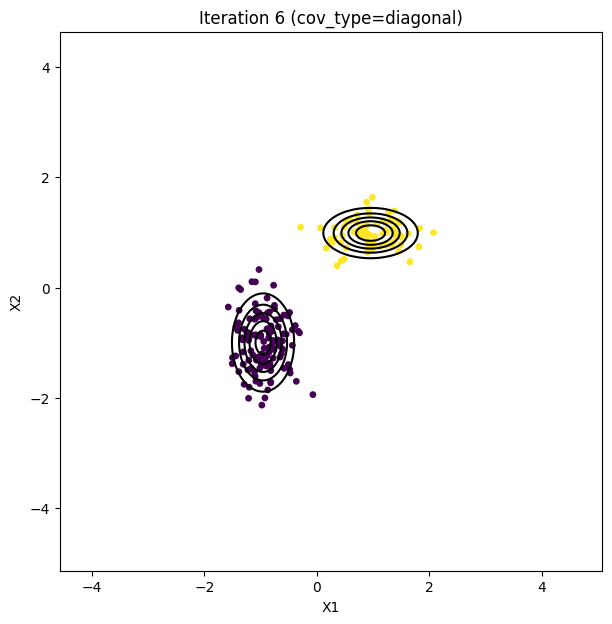

Iteration 7, Log-Likelihood: -289.763


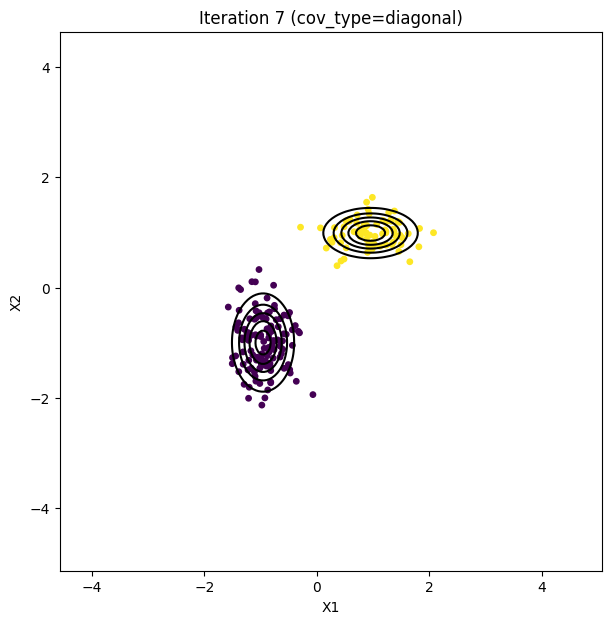

Iteration 8, Log-Likelihood: -289.763


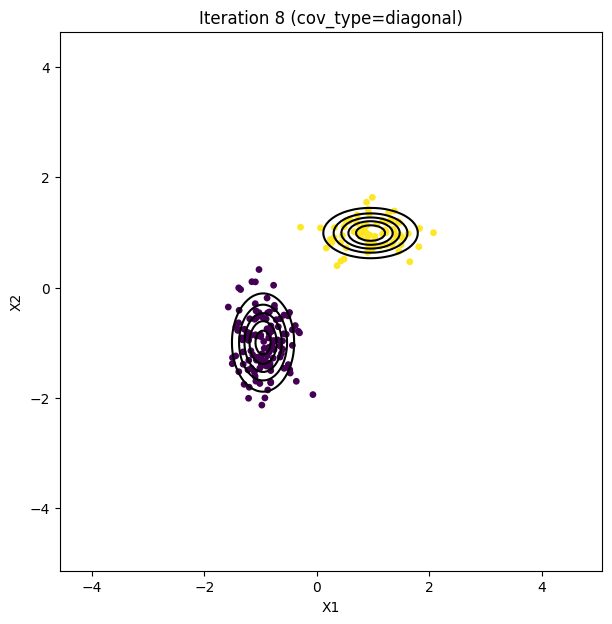

Iteration 9, Log-Likelihood: -289.763


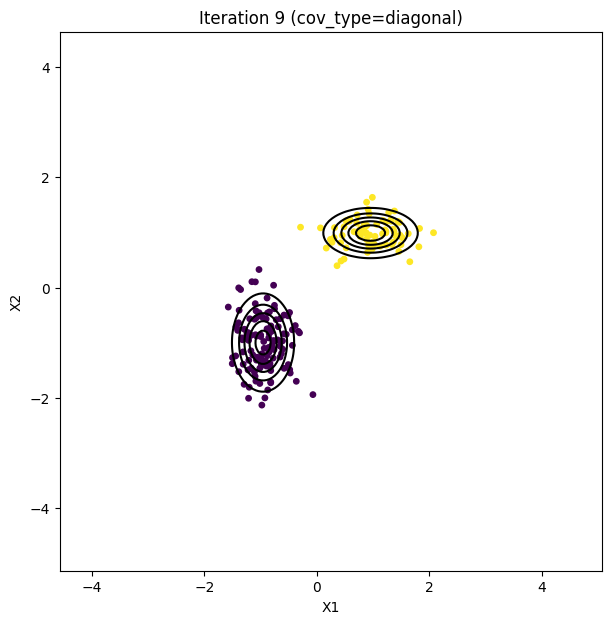


Running EM with covariance type: spherical
Iteration 0, Log-Likelihood: -596.586


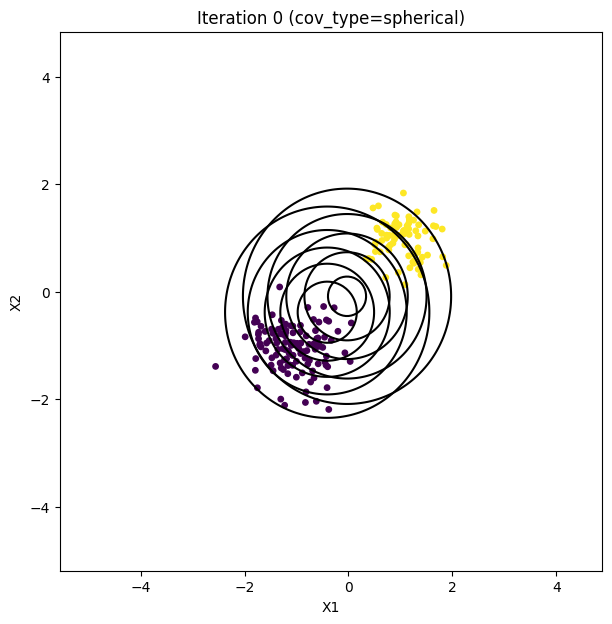

Iteration 1, Log-Likelihood: -582.643


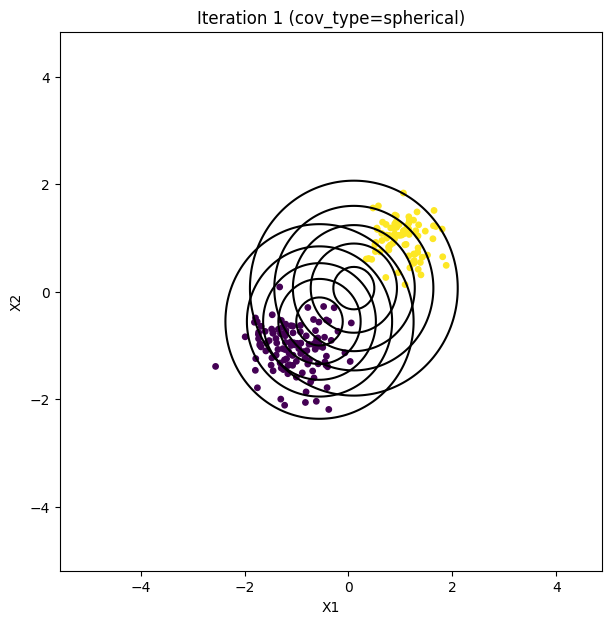

Iteration 2, Log-Likelihood: -529.015


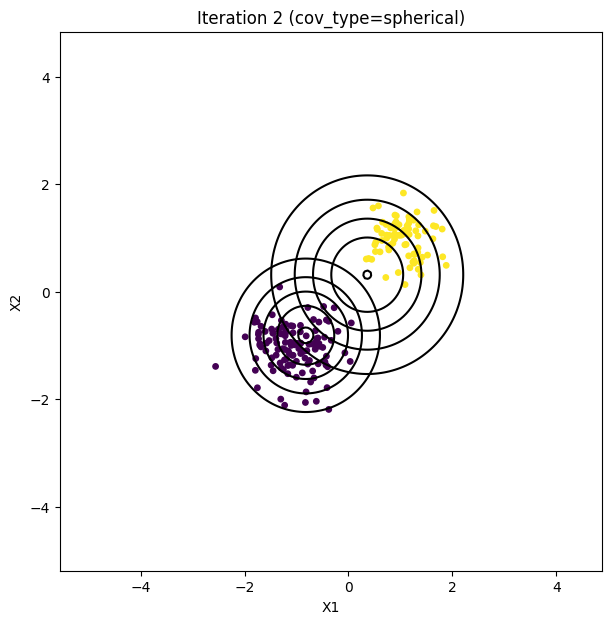

Iteration 3, Log-Likelihood: -414.103


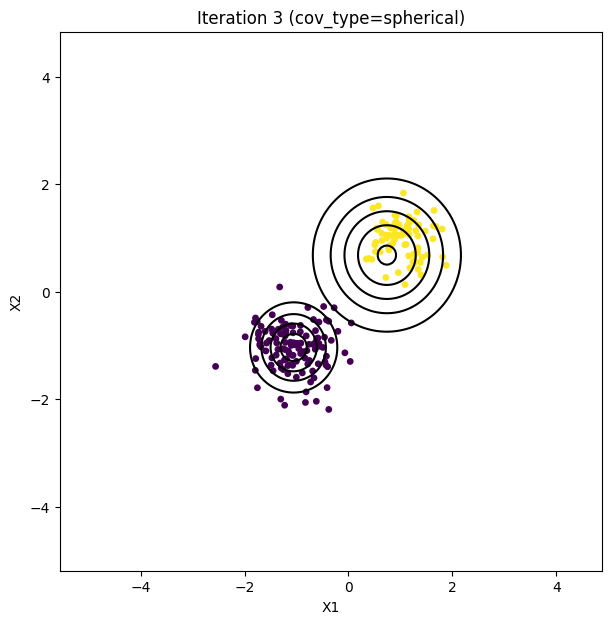

Iteration 4, Log-Likelihood: -342.204


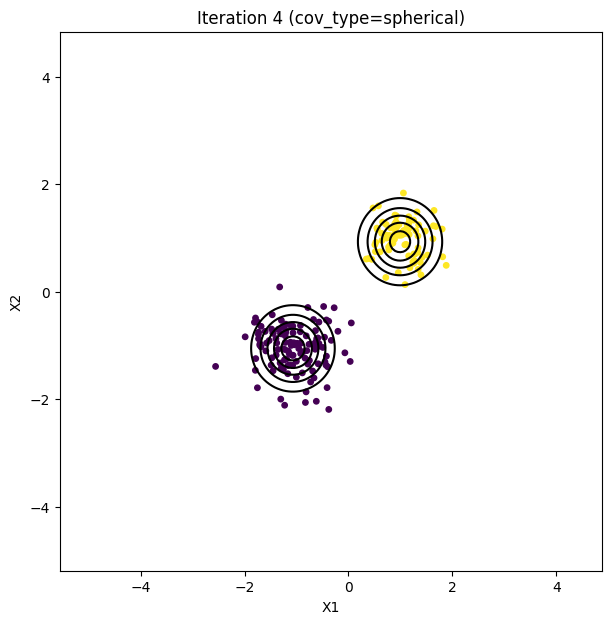

Iteration 5, Log-Likelihood: -332.429


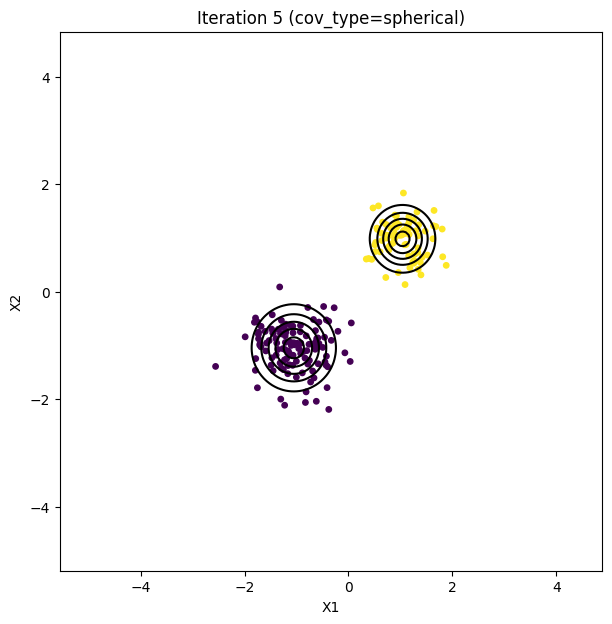

Iteration 6, Log-Likelihood: -332.429


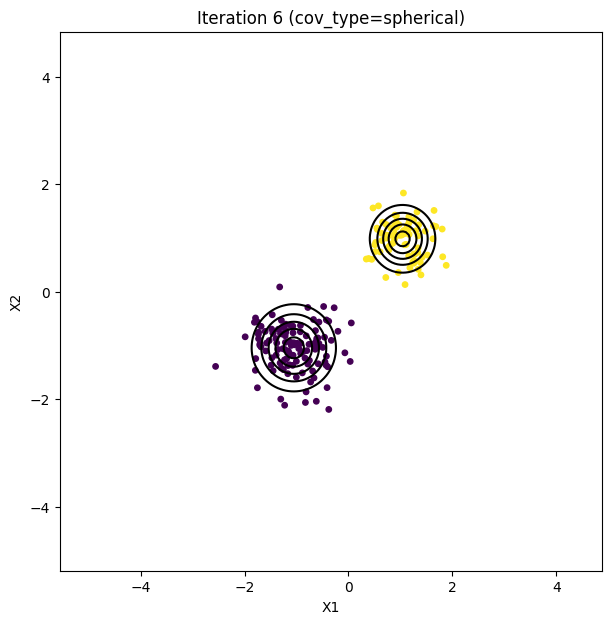

Iteration 7, Log-Likelihood: -332.429


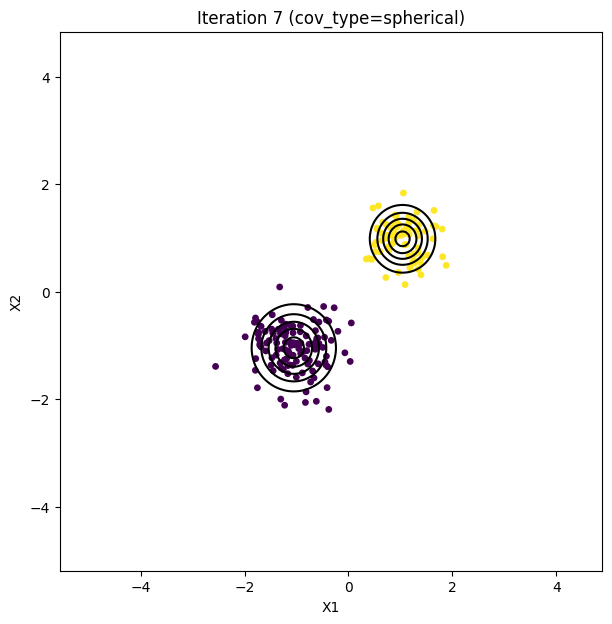

Iteration 8, Log-Likelihood: -332.429


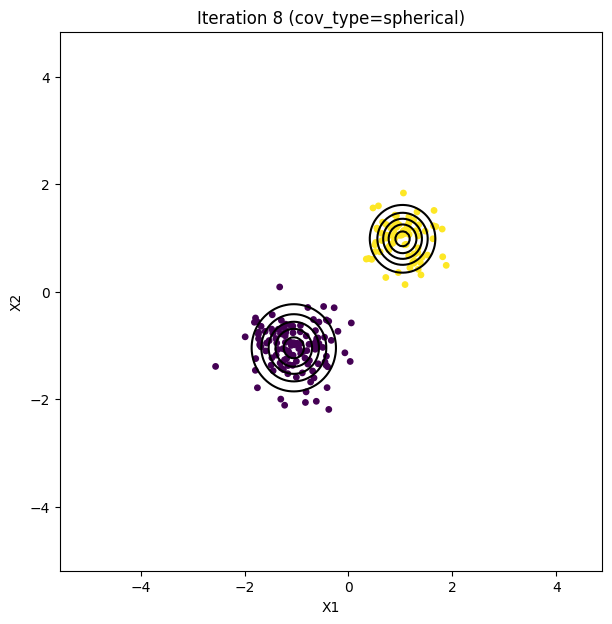

Iteration 9, Log-Likelihood: -332.429


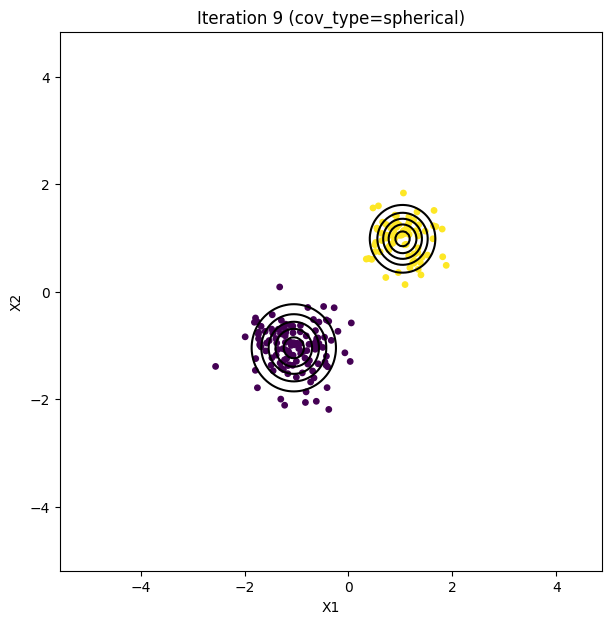

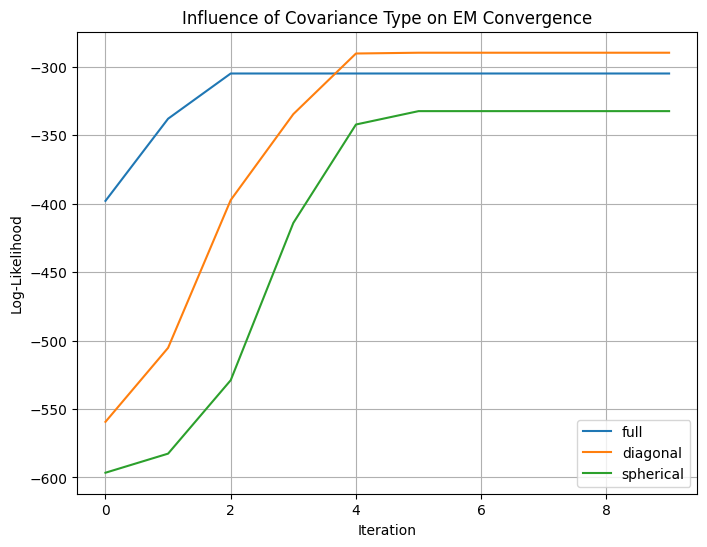

In [12]:
##########################################
# Part-6)-a: Generating synthetic data
##########################################
def generateData(pi, mu, sigma, N):
    """
    Generate N data points from a two-component GMM.

    Args:
      pi: list of weights (e.g., [0.6, 0.4])
      mu: list of means for each component (each a vector)
      sigma: list of covariance matrices (each a 2x2 matrix)
      N: number of data points

    Returns:
      data: (N, d) numpy array
      labels: (N,) numpy array of component indices
    """
    data = []
    labels = []
    M = len(pi)
    components = np.arange(M)
    for _ in range(N):
        k = rand.choices(components, weights=pi, k=1)[0]
        sample = np.random.multivariate_normal(mu[k], sigma[k])
        data.append(sample)
        labels.append(k)
    return np.asarray(data), np.asarray(labels)

# Define parameters for a 2-component GMM
pi_vals = [0.6, 0.4]
mu1 = [-1.0, -1.0]
mu2 = [1.0, 1.0]

# Full covariance matrices
sig_full1 = [[0.15, 0.1], [0.1, 0.25]]
sig_full2 = [[0.3, -0.25], [-0.25, 0.25]]

# Spherical covariance matrices (we interpret these as covariance = scalar * I)
sig_spherical1 = [[0.2, 0], [0, 0.2]]
sig_spherical2 = [[0.1, 0], [0, 0.1]]

# Diagonal covariance matrices
sig_diagonal1 = [[0.1, 0], [0, 0.2]]
sig_diagonal2 = [[0.2, 0], [0, 0.1]]

n_points = 200

# Create synthetic data sets (here we show one set per covariance type)
data_full, labels_full = generateData(pi_vals, [mu1, mu2], [sig_full1, sig_full2], n_points)
data_spher, labels_spher = generateData(pi_vals, [mu1, mu2], [sig_spherical1, sig_spherical2], n_points)
data_diag, labels_diag = generateData(pi_vals, [mu1, mu2], [sig_diagonal1, sig_diagonal2], n_points)

# Plot the generated data for each covariance type
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].scatter(data_full[:,0], data_full[:,1], c=labels_full, cmap='viridis', s=30)
ax[0].set_title('Full Covariance Data')
ax[0].set_xlabel("X1"), ax[0].set_ylabel("X2")

ax[1].scatter(data_spher[:,0], data_spher[:,1], c=labels_spher, cmap='viridis', s=30)
ax[1].set_title('Spherical Covariance Data')
ax[1].set_xlabel("X1"), ax[1].set_ylabel("X2")

ax[2].scatter(data_diag[:,0], data_diag[:,1], c=labels_diag, cmap='viridis', s=30)
ax[2].set_title('Diagonal Covariance Data')
ax[2].set_xlabel("X1"), ax[2].set_ylabel("X2")

plt.tight_layout()
plt.show()

##########################################
# Part-6)-b: Implementation of the EM algorithm
##########################################

def multivariate_normal_pdf(x, mean, cov):
    D = len(mean)
    x = np.asarray(x)
    mean = np.asarray(mean)
    cov = np.asarray(cov)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), D / 2) * np.sqrt(det_cov))
    diff = x - mean
    exponent = -0.5 * np.dot(diff.T, np.dot(inv_cov, diff))
    return norm_const * np.exp(exponent)

############################################################################
# Log-Likelihood function
############################################################################
def likelihood(data, pi, mu, sigma):
    """
    Compute the total log-likelihood of the data given the GMM parameters.
    """
    N = data.shape[0]
    M = len(pi)
    total_ll = 0
    for n in range(N):
        prob = 0
        for k in range(M):
            prob += pi[k] * multivariate_normal_pdf(data[n], mean=mu[k], cov=sigma[k])
        total_ll += np.log(prob)
    return total_ll

############################################################################
# Expectation Step: Compute responsibilities gamma_{nk}
############################################################################
def expectation(data, pi, mu, sigma):
    N = data.shape[0]
    M = len(pi)
    gamma = np.zeros((N, M))
    for n in range(N):
        denom = 0
        for m in range(M):
            gamma[n, m] = pi[m] * multivariate_normal_pdf(data[n], mean=mu[m], cov=sigma[m])
            denom += gamma[n, m]
        gamma[n, :] /= denom
    return gamma

############################################################################
# Maximization Step (with covariance type control)
############################################################################
def maximization(data, gamma, cov_type="full"):
    """
    Update the GMM parameters given responsibilities gamma.

    cov_type: "full" (default), "diagonal", or "spherical"
    """
    N, D = data.shape
    M = gamma.shape[1]
    mu_new = []
    sigma_new = []
    pi_new = []

    for k in range(M):
        N_k = np.sum(gamma[:, k])
        # Update mean: weighted average
        mu_k = np.sum(gamma[:, k][:, None] * data, axis=0) / N_k
        mu_new.append(mu_k)
        # Update covariance
        diff = data - mu_k
        sigma_k = np.dot((gamma[:, k][:, None] * diff).T, diff) / N_k

        if cov_type == "diagonal":
            sigma_k = np.diag(np.diag(sigma_k))
        elif cov_type == "spherical":
            # Use scalar variance = (trace(sigma_k)/D)
            sigma_k = (np.trace(sigma_k)/D) * np.eye(D)
        # Else full covariance remains unchanged

        sigma_new.append(sigma_k)
        pi_new.append(N_k / N)

    return np.array(pi_new), np.array(mu_new), np.array(sigma_new)

############################################################################
# Plot contours of the estimated components over the data
############################################################################
def plot_contours(data, labels, pi, mu, sigma, title="GMM Contours"):
    x_min, x_max = data[:,0].min()-3, data[:,0].max()+3
    y_min, y_max = data[:,1].min()-3, data[:,1].max()+3
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    plt.figure(figsize=(7, 7))
    plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis', s=15)
    M = len(pi)
    for k in range(M):
        rv = multivariate_normal(mean=mu[k], cov=sigma[k])
        z = rv.pdf(grid).reshape(xx.shape)
        plt.contour(xx, yy, z, levels=5, colors='black')
    plt.title(title)
    plt.xlabel("X1"), plt.ylabel("X2")
    plt.show()

##########################################
# EM algorithm runner function
##########################################
def run_EM(data, labels, nsteps=10, cov_type="full", init_seed=None):
    N, D = data.shape
    M = 2  # number of components

    if init_seed is not None:
        np.random.seed(init_seed)

    # Initialize parameters: equally weighted, means as two random data points, covariances = identity
    pi_em = np.ones(M) / M
    rand_indices = np.random.choice(N, M, replace=False)
    mu_em = data[rand_indices]
    sigma_em = np.array([np.eye(D) for _ in range(M)])

    ll_history = []

    for idx in range(nsteps):
        gamma = expectation(data, pi_em, mu_em, sigma_em)
        pi_em, mu_em, sigma_em = maximization(data, gamma, cov_type=cov_type)
        ll = likelihood(data, pi_em, mu_em, sigma_em)
        ll_history.append(ll)
        print(f"Iteration {idx}, Log-Likelihood: {ll:.3f}")
        plot_contours(data, labels, pi_em, mu_em, sigma_em, title=f"Iteration {idx} (cov_type={cov_type})")

    return pi_em, mu_em, sigma_em, ll_history


##########################################
# Part-6)-d: Understanding the issues with EM algorithm
##########################################
# 1. Influence of Initialization
print("\n--- EM with Different Initializations (Full Covariance) ---")
n_inits = 3  # run EM with 3 different initial seeds
init_ll_histories = []

for seed in [0, 42, 100]:
    print(f"\nRunning EM with init seed {seed}...")
    _, _, _, ll_hist = run_EM(data_full, labels_full, nsteps=10, cov_type="full", init_seed=seed)
    init_ll_histories.append((seed, ll_hist))

# Plot log-likelihood trajectories for different initializations.
plt.figure(figsize=(8,6))
for seed, ll_hist in init_ll_histories:
    plt.plot(ll_hist, label=f'init seed {seed}')
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("Influence of Initialization on EM Convergence (Full Cov)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Influence of Covariance Type
print("\n--- EM with Different Covariance Types ---")
cov_types = ["full", "diagonal", "spherical"]
datasets = [data_full, data_diag, data_spher]
label_sets = [labels_full, labels_diag, labels_spher]
cov_ll_histories = {}

for ctype, dataset, labels in zip(cov_types, datasets, label_sets):
    print(f"\nRunning EM with covariance type: {ctype}")
    _, _, _, ll_hist = run_EM(dataset, labels, nsteps=10, cov_type=ctype, init_seed=42)
    cov_ll_histories[ctype] = ll_hist

# Plot log-likelihood trajectories for different covariance types.
plt.figure(figsize=(8,6))
for ctype, ll_hist in cov_ll_histories.items():
    plt.plot(ll_hist, label=ctype)
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("Influence of Covariance Type on EM Convergence")
plt.legend()
plt.grid(True)
plt.show()


<b> Report your observations </b>

1. Different random initializations of means, covariances, and weights led to different convergence paths and in one of the cases the convergence was much slower than the others.

2. Covariance type diagonal and spherical have very similar error. full covariance type may perform worse or better than them depending on the data and initialization.


